In [1]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

<Client: 'tcp://127.0.0.1:41953' processes=12 threads=96, memory=0.98 TiB>

In [2]:
## Read in adjoint sensitivity diagnostics for a transect from 0-60m at 140W (1S to 1N) 
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import xarray as xr
from xmitgcm import open_mdsdataset
import numpy as np
import warnings
# warnings.filterwarnings("ignore")

data_dir = '/data/SO3/edavenport/tpose6/sep2012/sens_surface/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

num_diags = 122 #
itPerFile = 72 # 1 day
intervals = range(0,itPerFile*num_diags,itPerFile) # adjoint sensitivity will start at 0 and go to 1 lag (1 interval less than total number of timesteps)

# when prefix is not set, this will read all available files 
# have to ignore unkown vars until we have an available_diagnostics.log that includes ADJrhoinsitu
tpose_ds = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,ref_date='2012-09-01',delta_t=1200,ignore_unknown_vars=True)
tpose_ds['XC'] = tpose_ds.XC.astype(float)
tpose_ds['YC'] = tpose_ds.YC.astype(float)
tpose_ds['Z'] = tpose_ds.Z.astype(float)
tpose_ds['XG'] = tpose_ds.XG.astype(float)
tpose_ds['YG'] = tpose_ds.YG.astype(float)



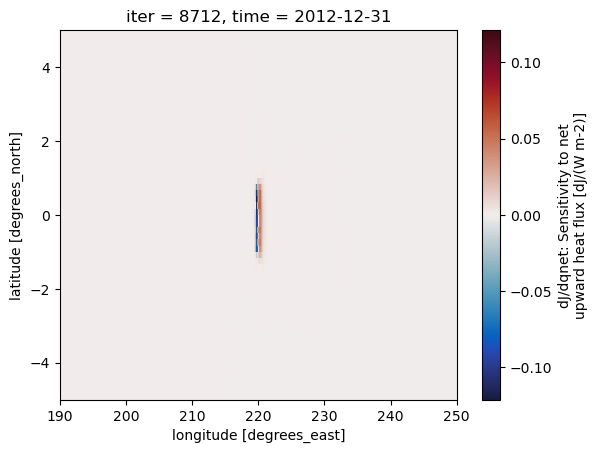

In [3]:
tpose_ds.ADJqnet[-1].sel(XC=slice(190,250),YC=slice(-5,5)).plot(x='XC', y='YC',cmap=cmo.balance)

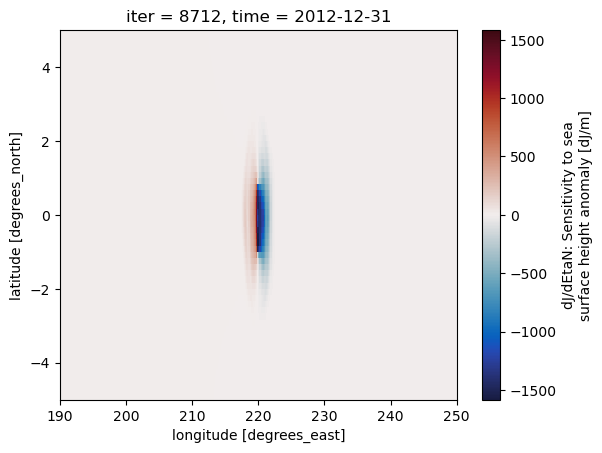

In [4]:
tpose_ds.ADJetan[-1].sel(XC=slice(190,250),YC=slice(-5,5)).plot(x='XC', y='YC',cmap=cmo.balance)

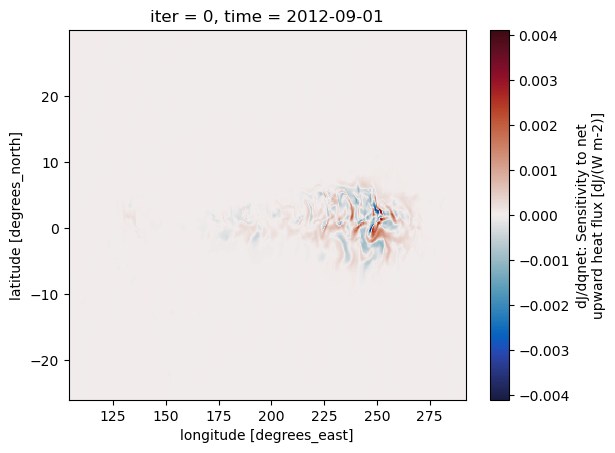

In [5]:
tpose_ds.ADJqnet[0].plot(x='XC', y='YC',cmap=cmo.balance)

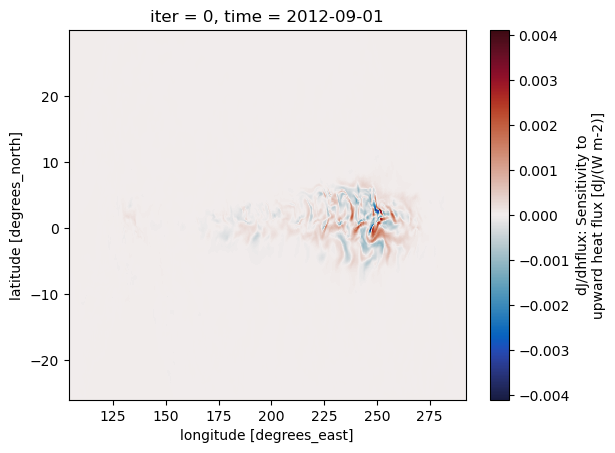

In [6]:
tpose_ds.ADJhflux[0].plot(x='XC', y='YC',cmap=cmo.balance)

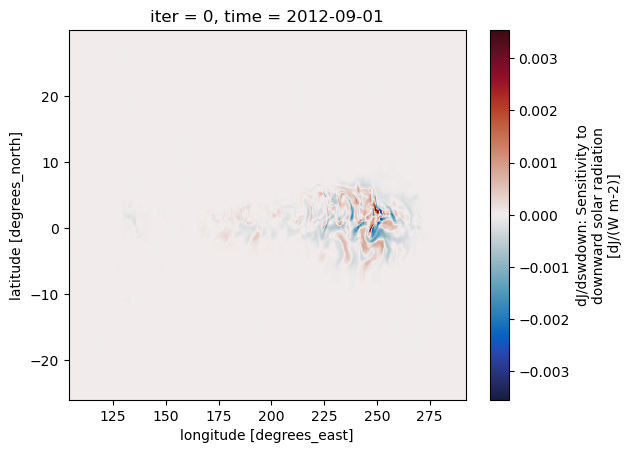

In [7]:
tpose_ds.ADJswdown[0].plot(x='XC', y='YC',cmap=cmo.balance)

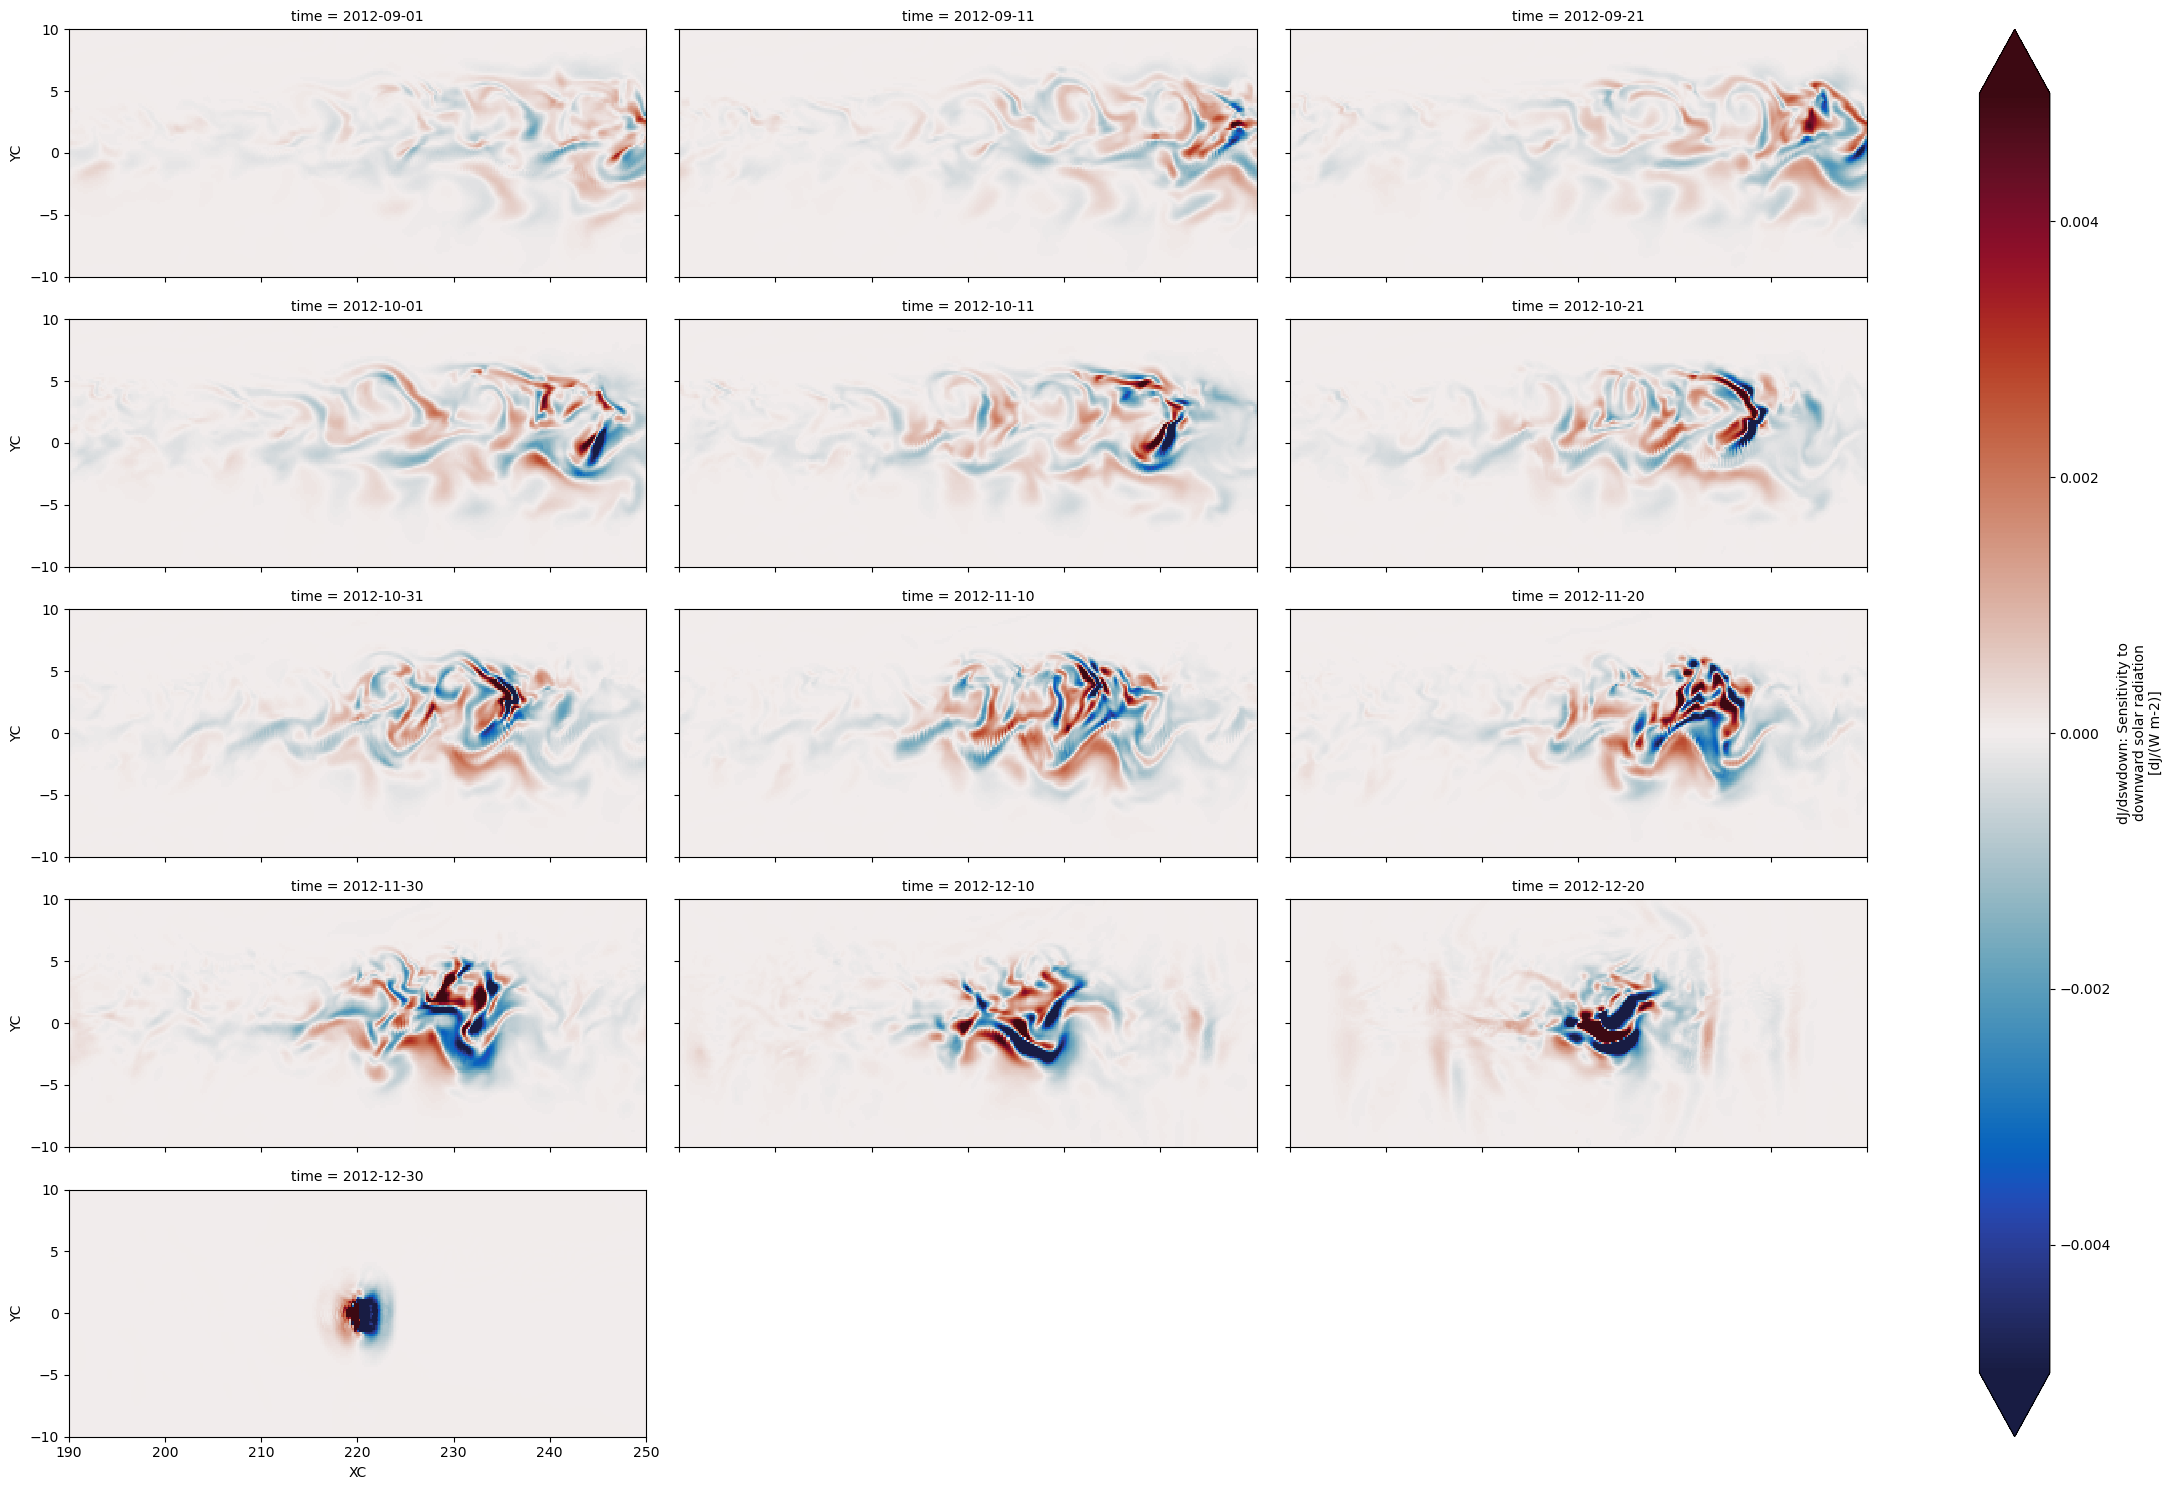

In [8]:
tpose_ds.ADJswdown[::10].sel(XC=slice(190,250),YC=slice(-10,10)).plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.005, vmax=0.005, robust=True)

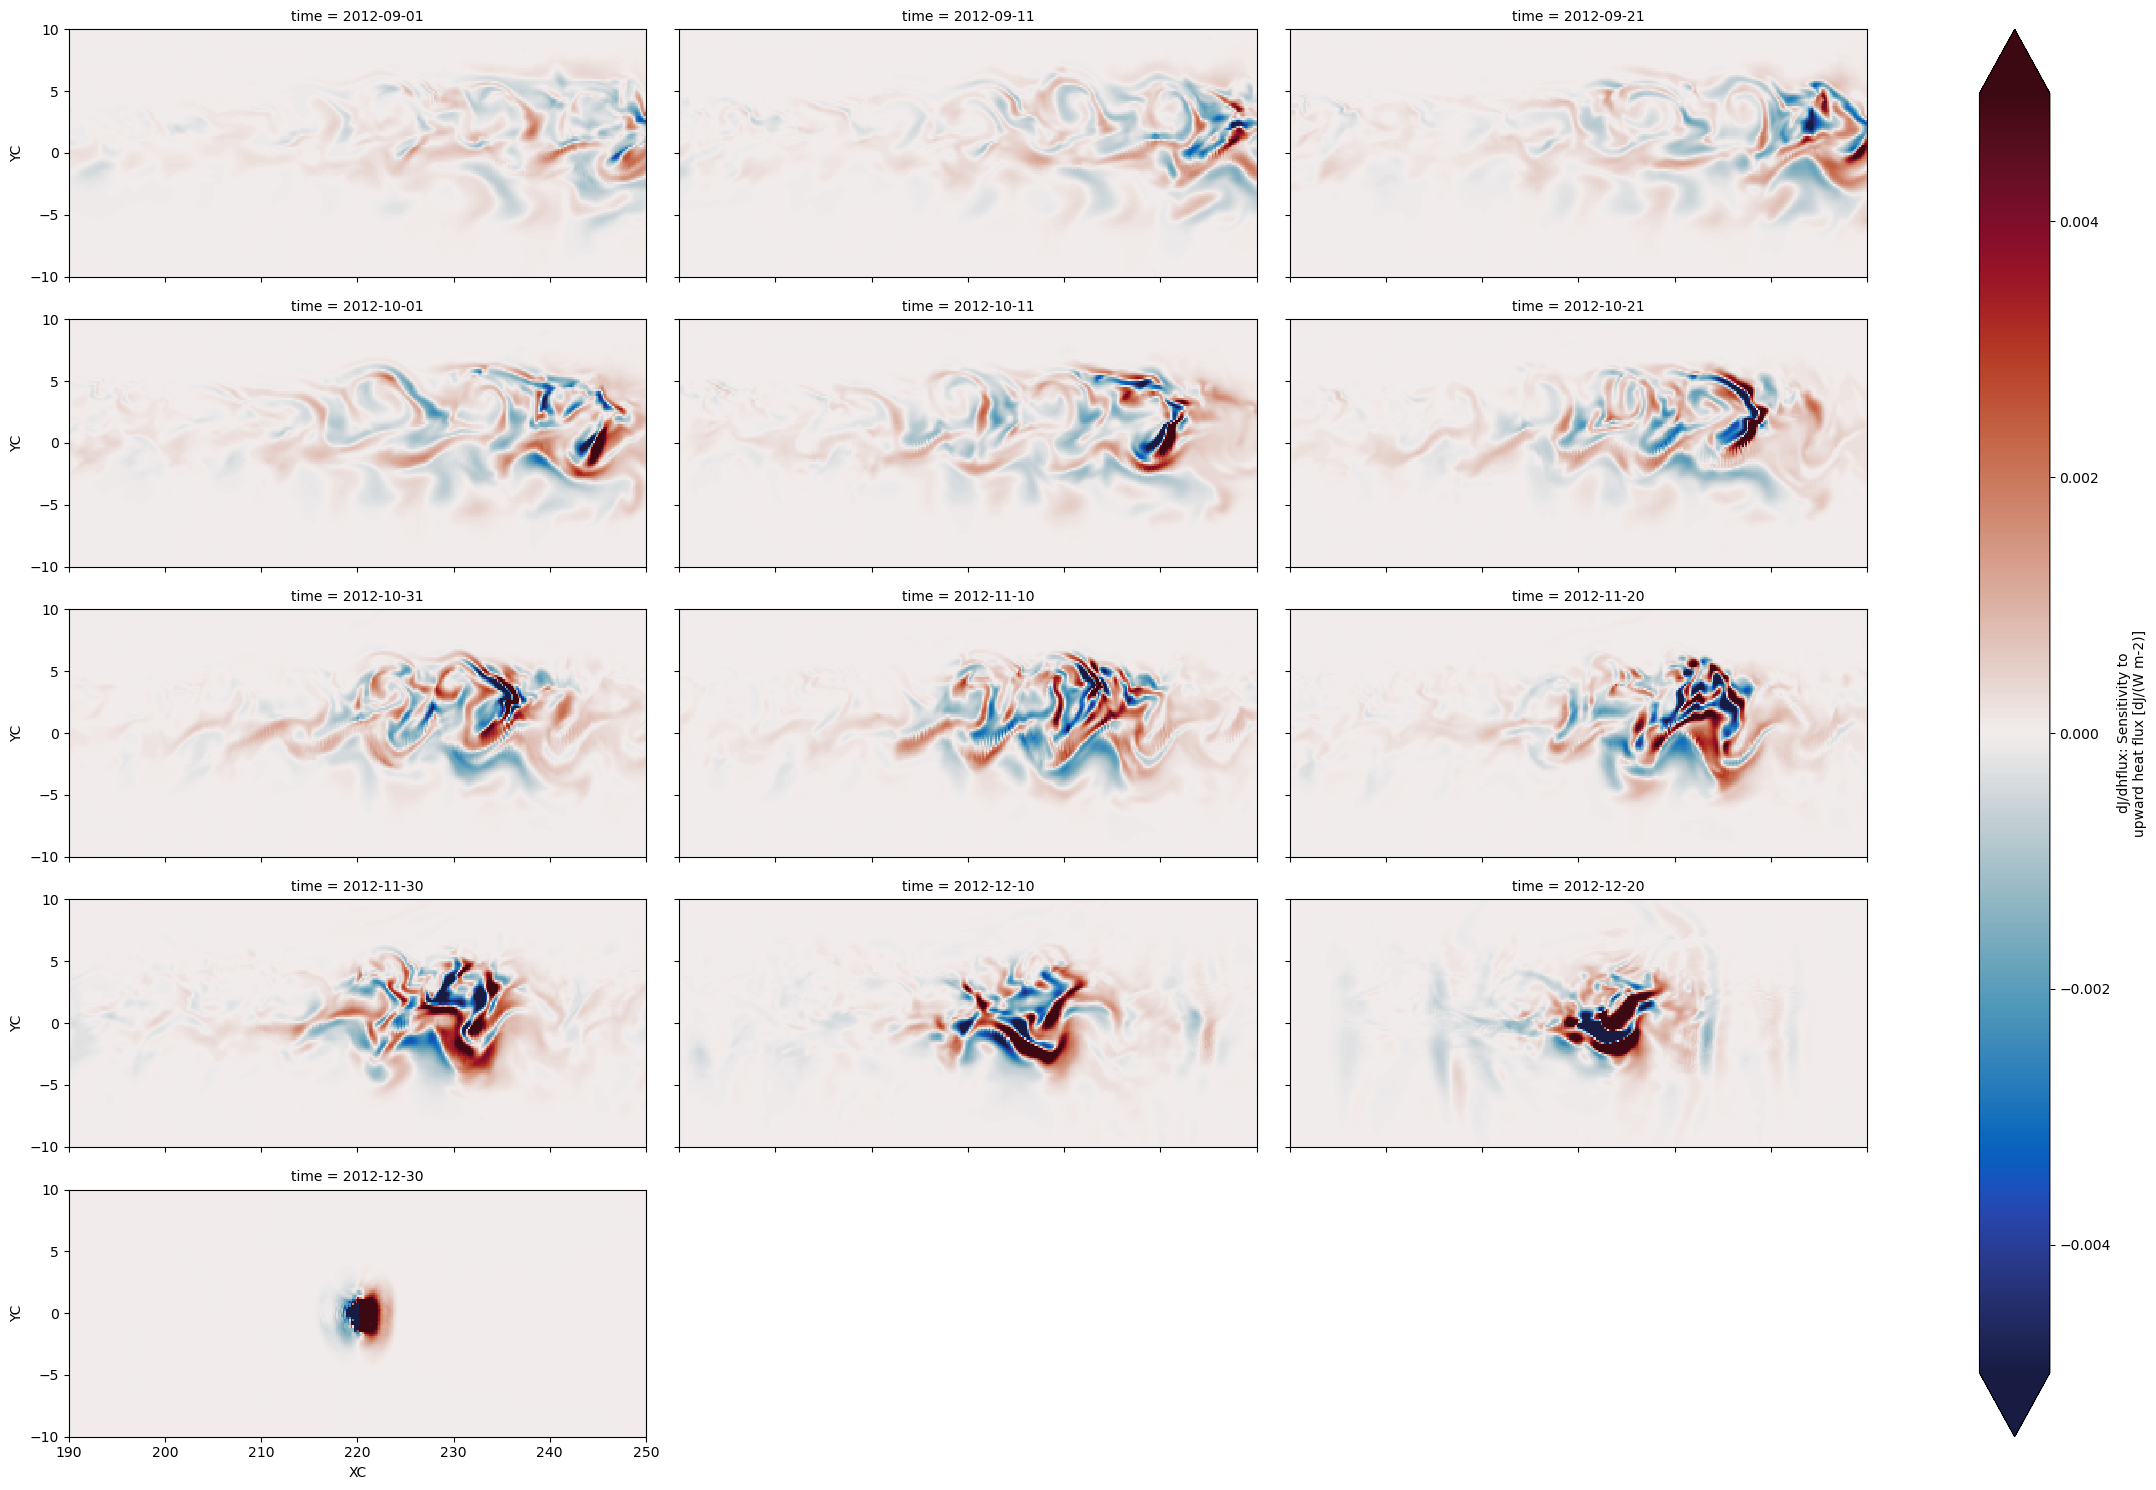

In [9]:
tpose_ds.ADJhflux[::10].sel(XC=slice(190,250),YC=slice(-10,10)).plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.005, vmax=0.005, robust=True)

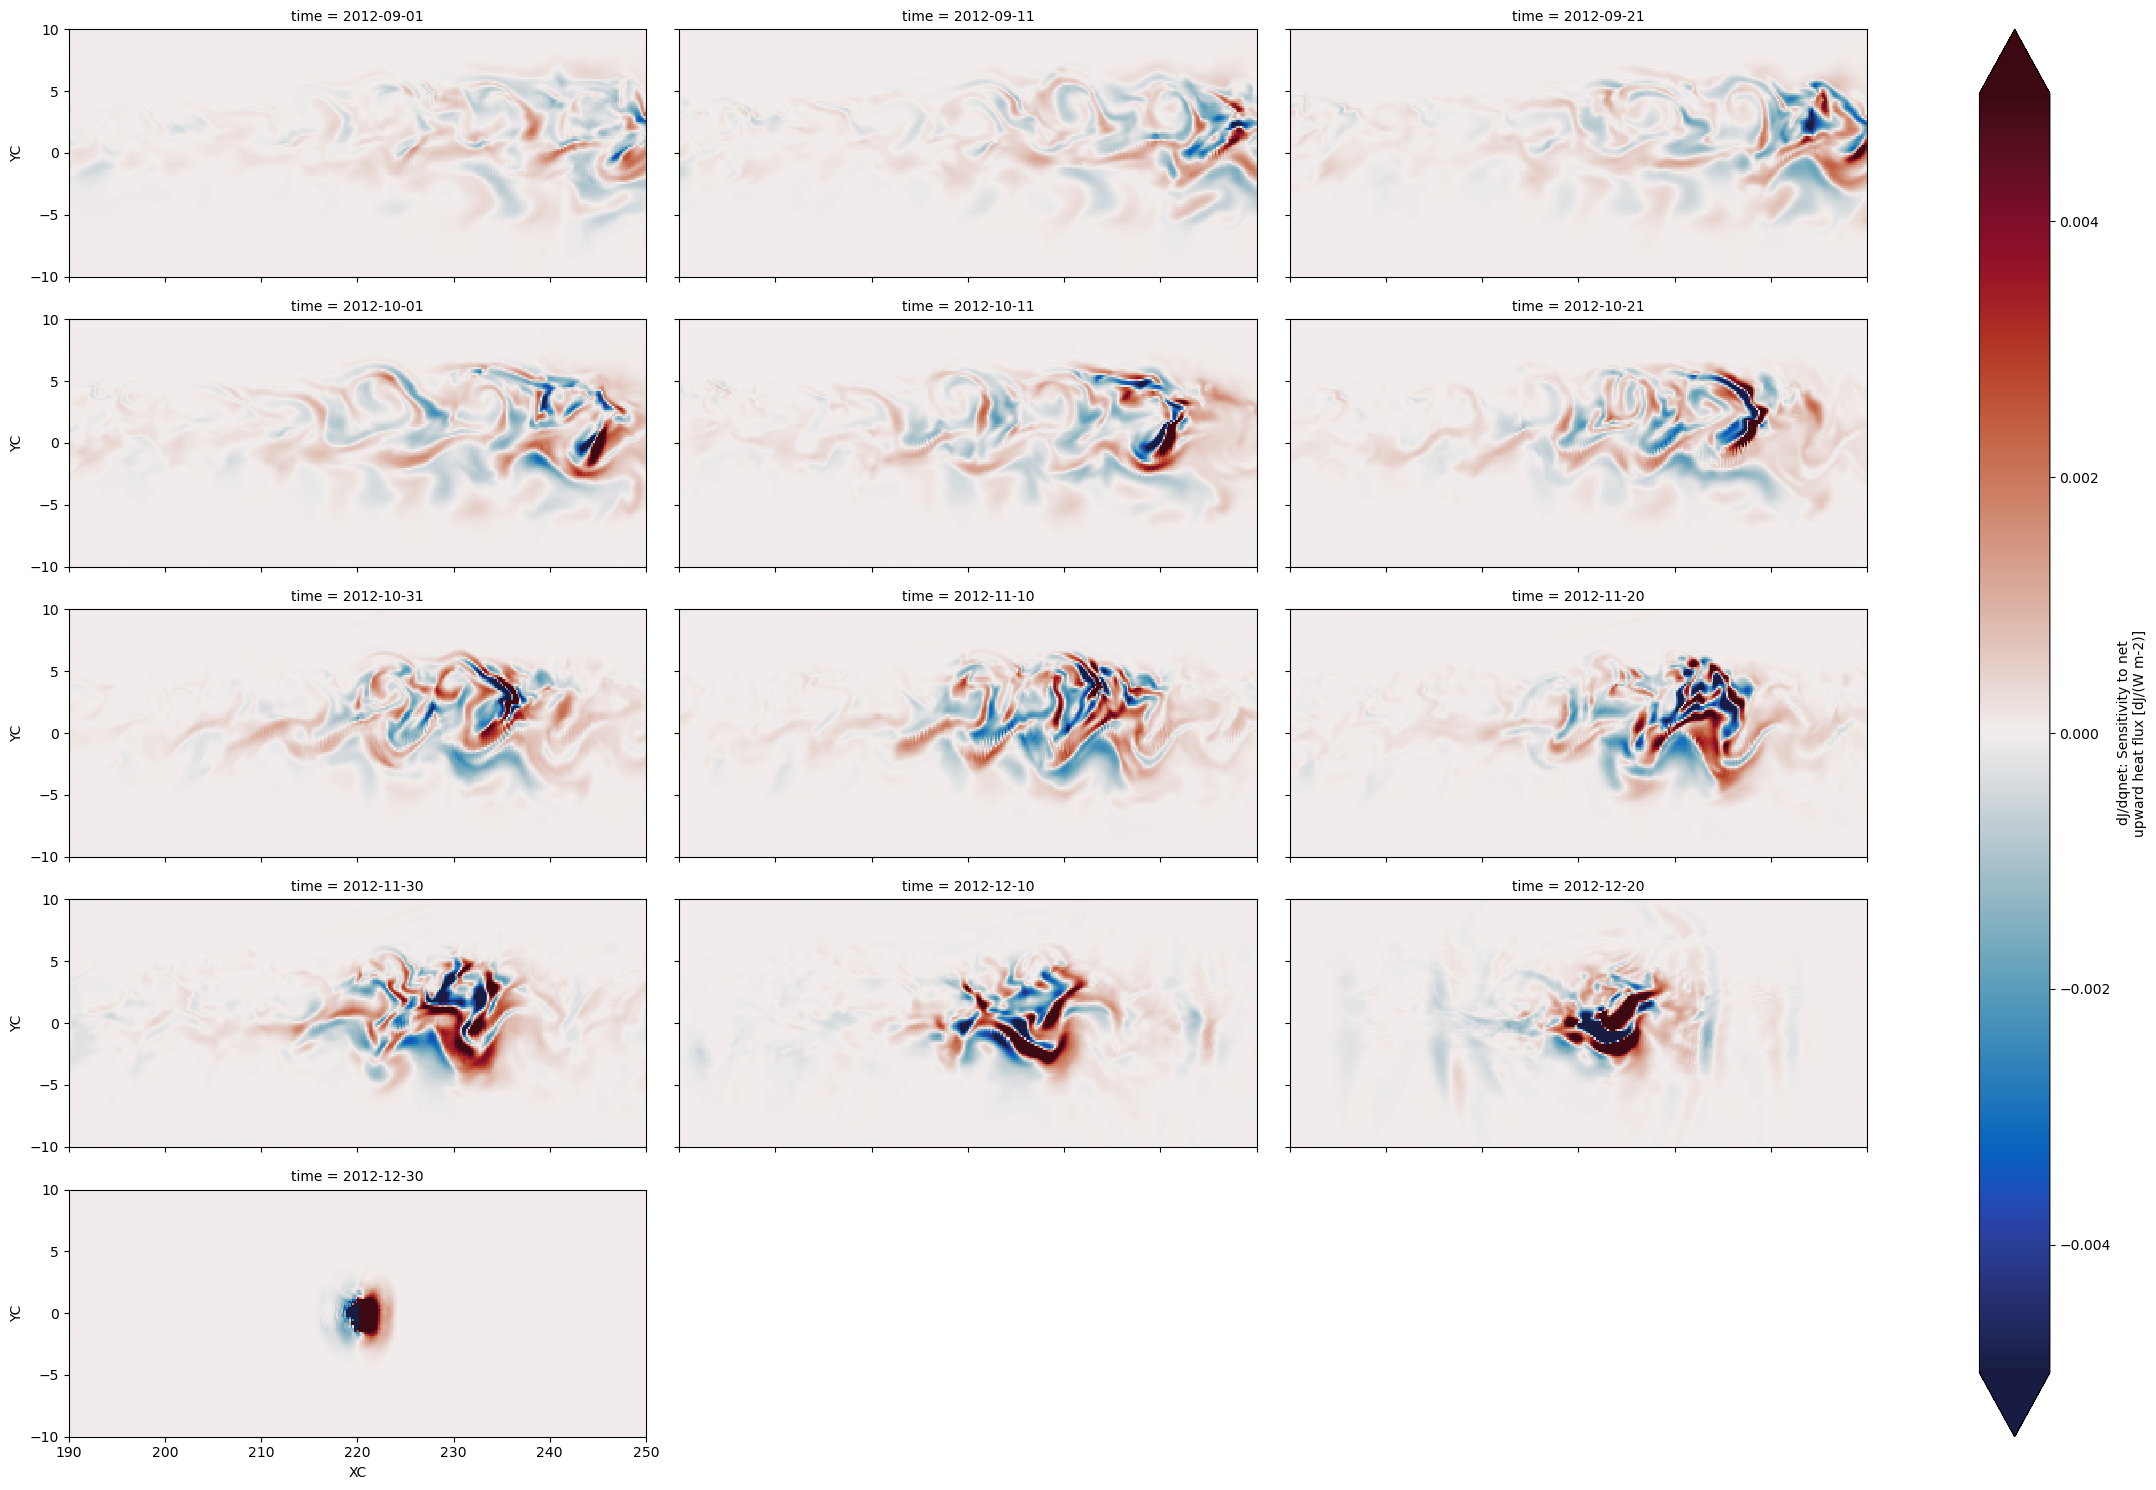

In [10]:
tpose_ds.ADJqnet[::10].sel(XC=slice(190,250),YC=slice(-10,10)).plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.005, vmax=0.005, robust=True)

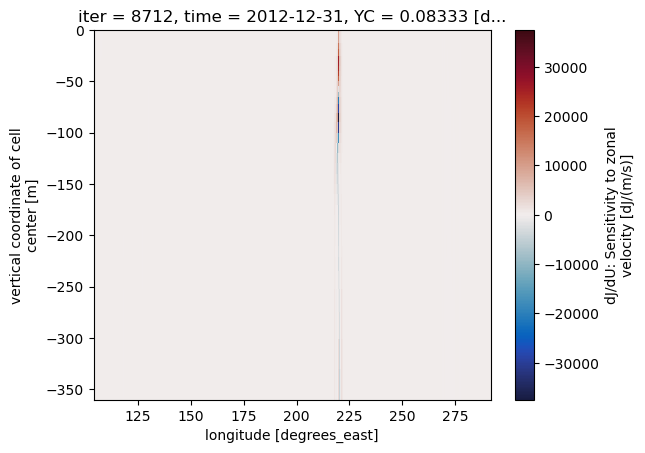

In [11]:
tpose_ds.ADJuvel[-1,:40].sel(YC=[0.0],method='nearest').plot(x='XG', y='Z', cmap=cmo.balance)

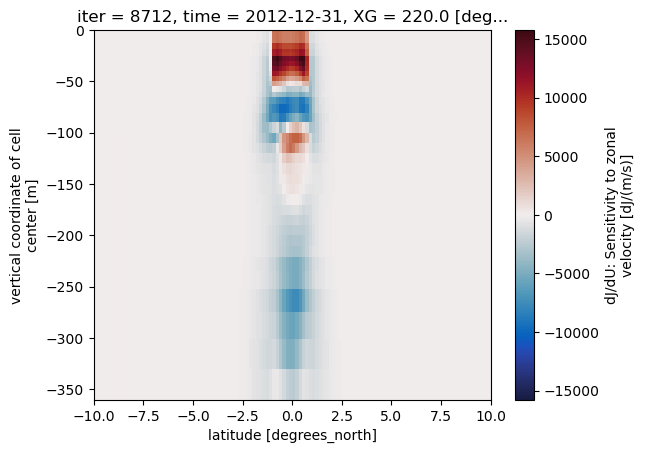

In [12]:
tpose_ds.ADJuvel[-1,:40].sel(XG=[220.0],method='nearest').sel(YC=slice(-10,10)).plot(x='YC', y='Z', cmap=cmo.balance)

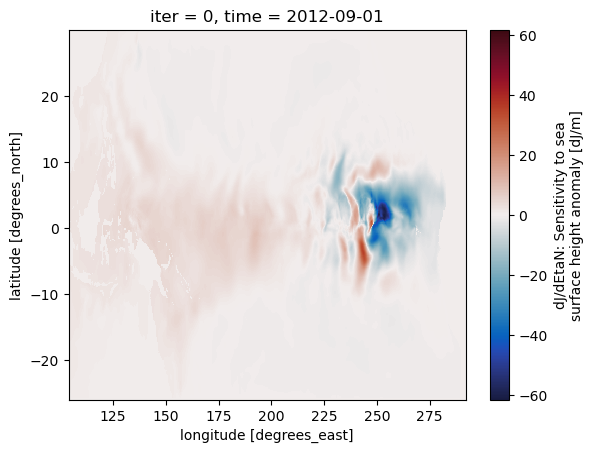

In [13]:
tpose_ds.ADJetan[0].plot(x='XC', y='YC',cmap=cmo.balance)

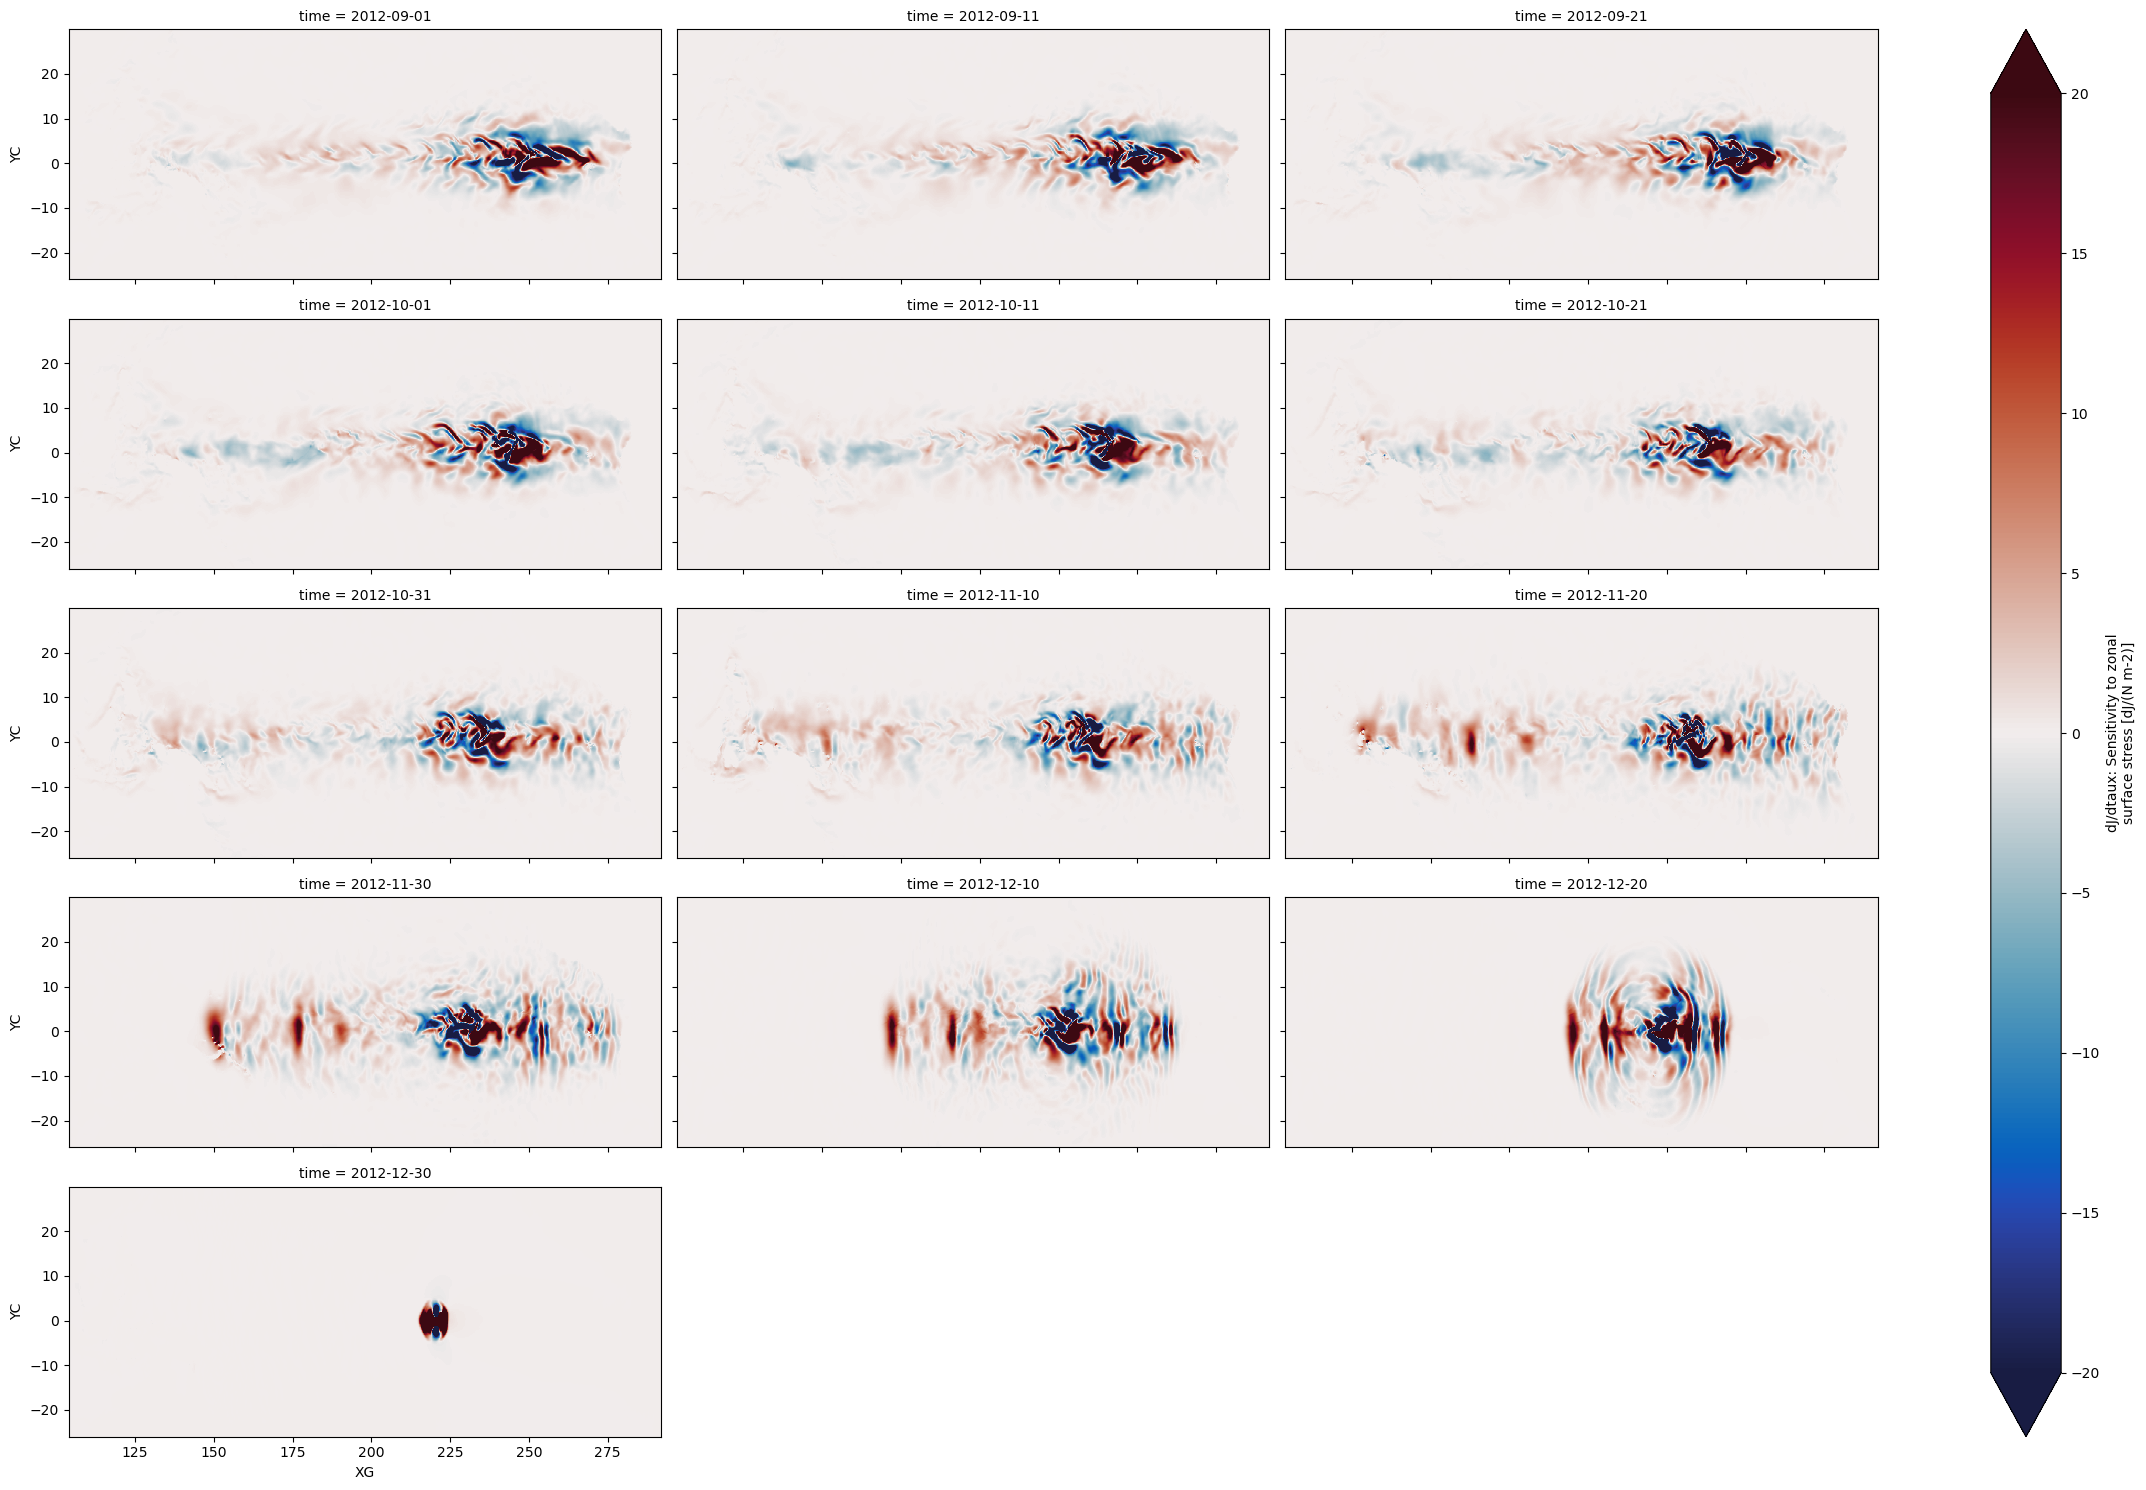

In [14]:
tpose_ds.ADJtaux[::10].plot(x='XG', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-20, vmax=20,cmap=cmo.balance)

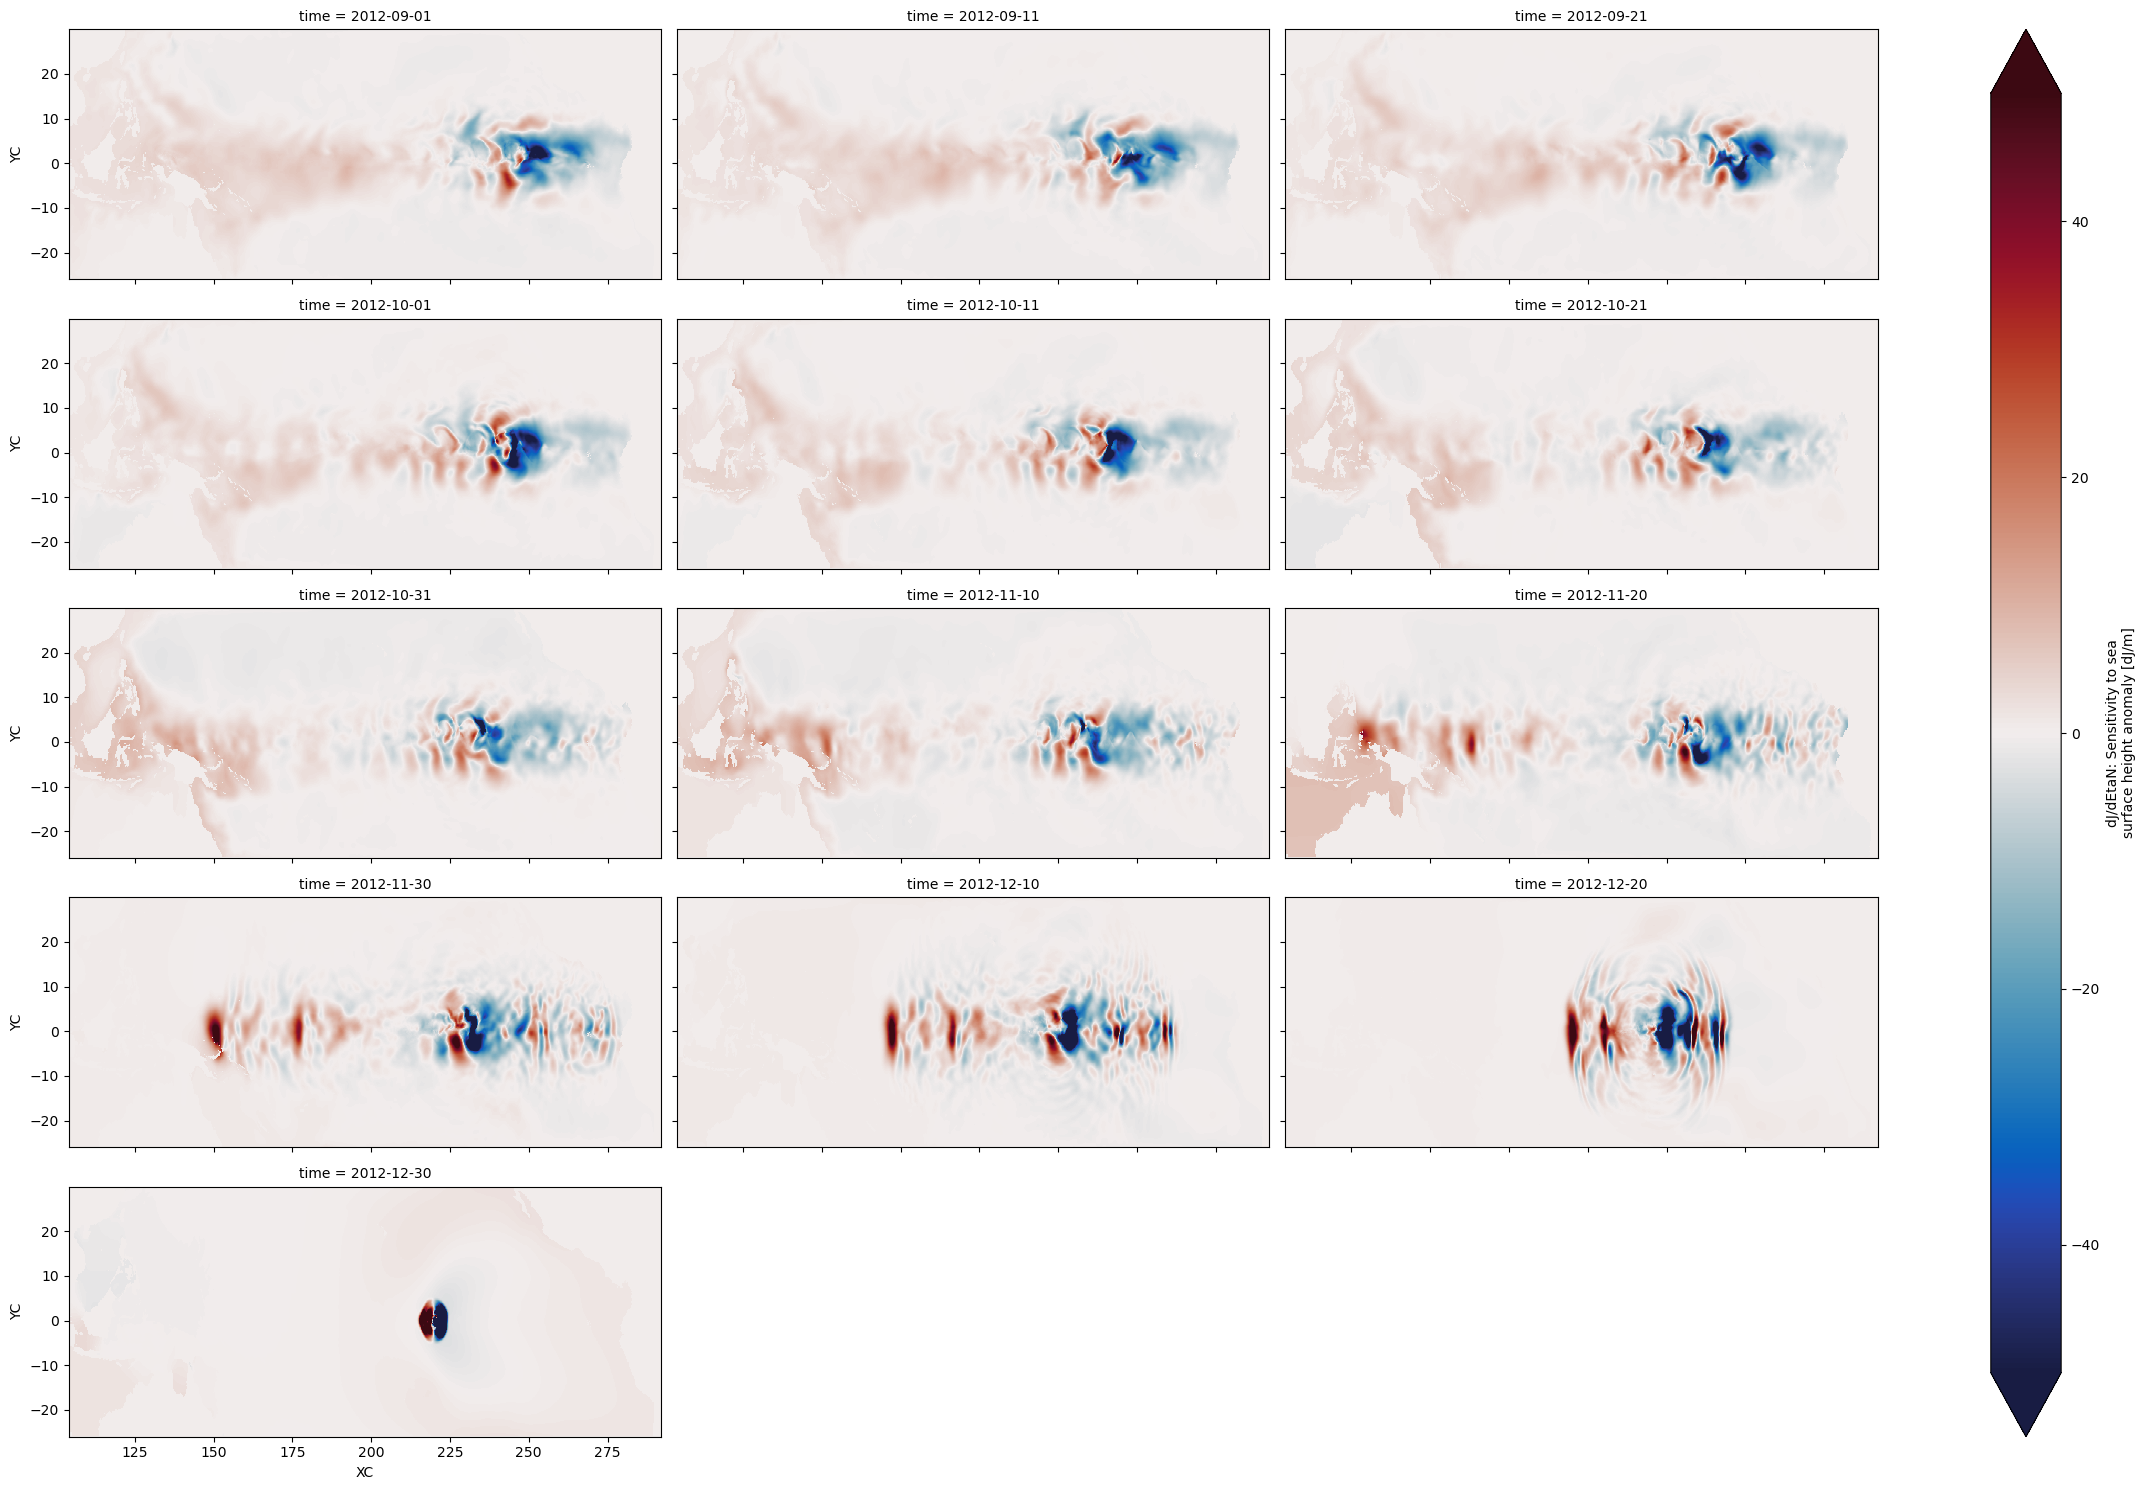

In [15]:
tpose_ds.ADJetan[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-50, vmax=50,cmap=cmo.balance)

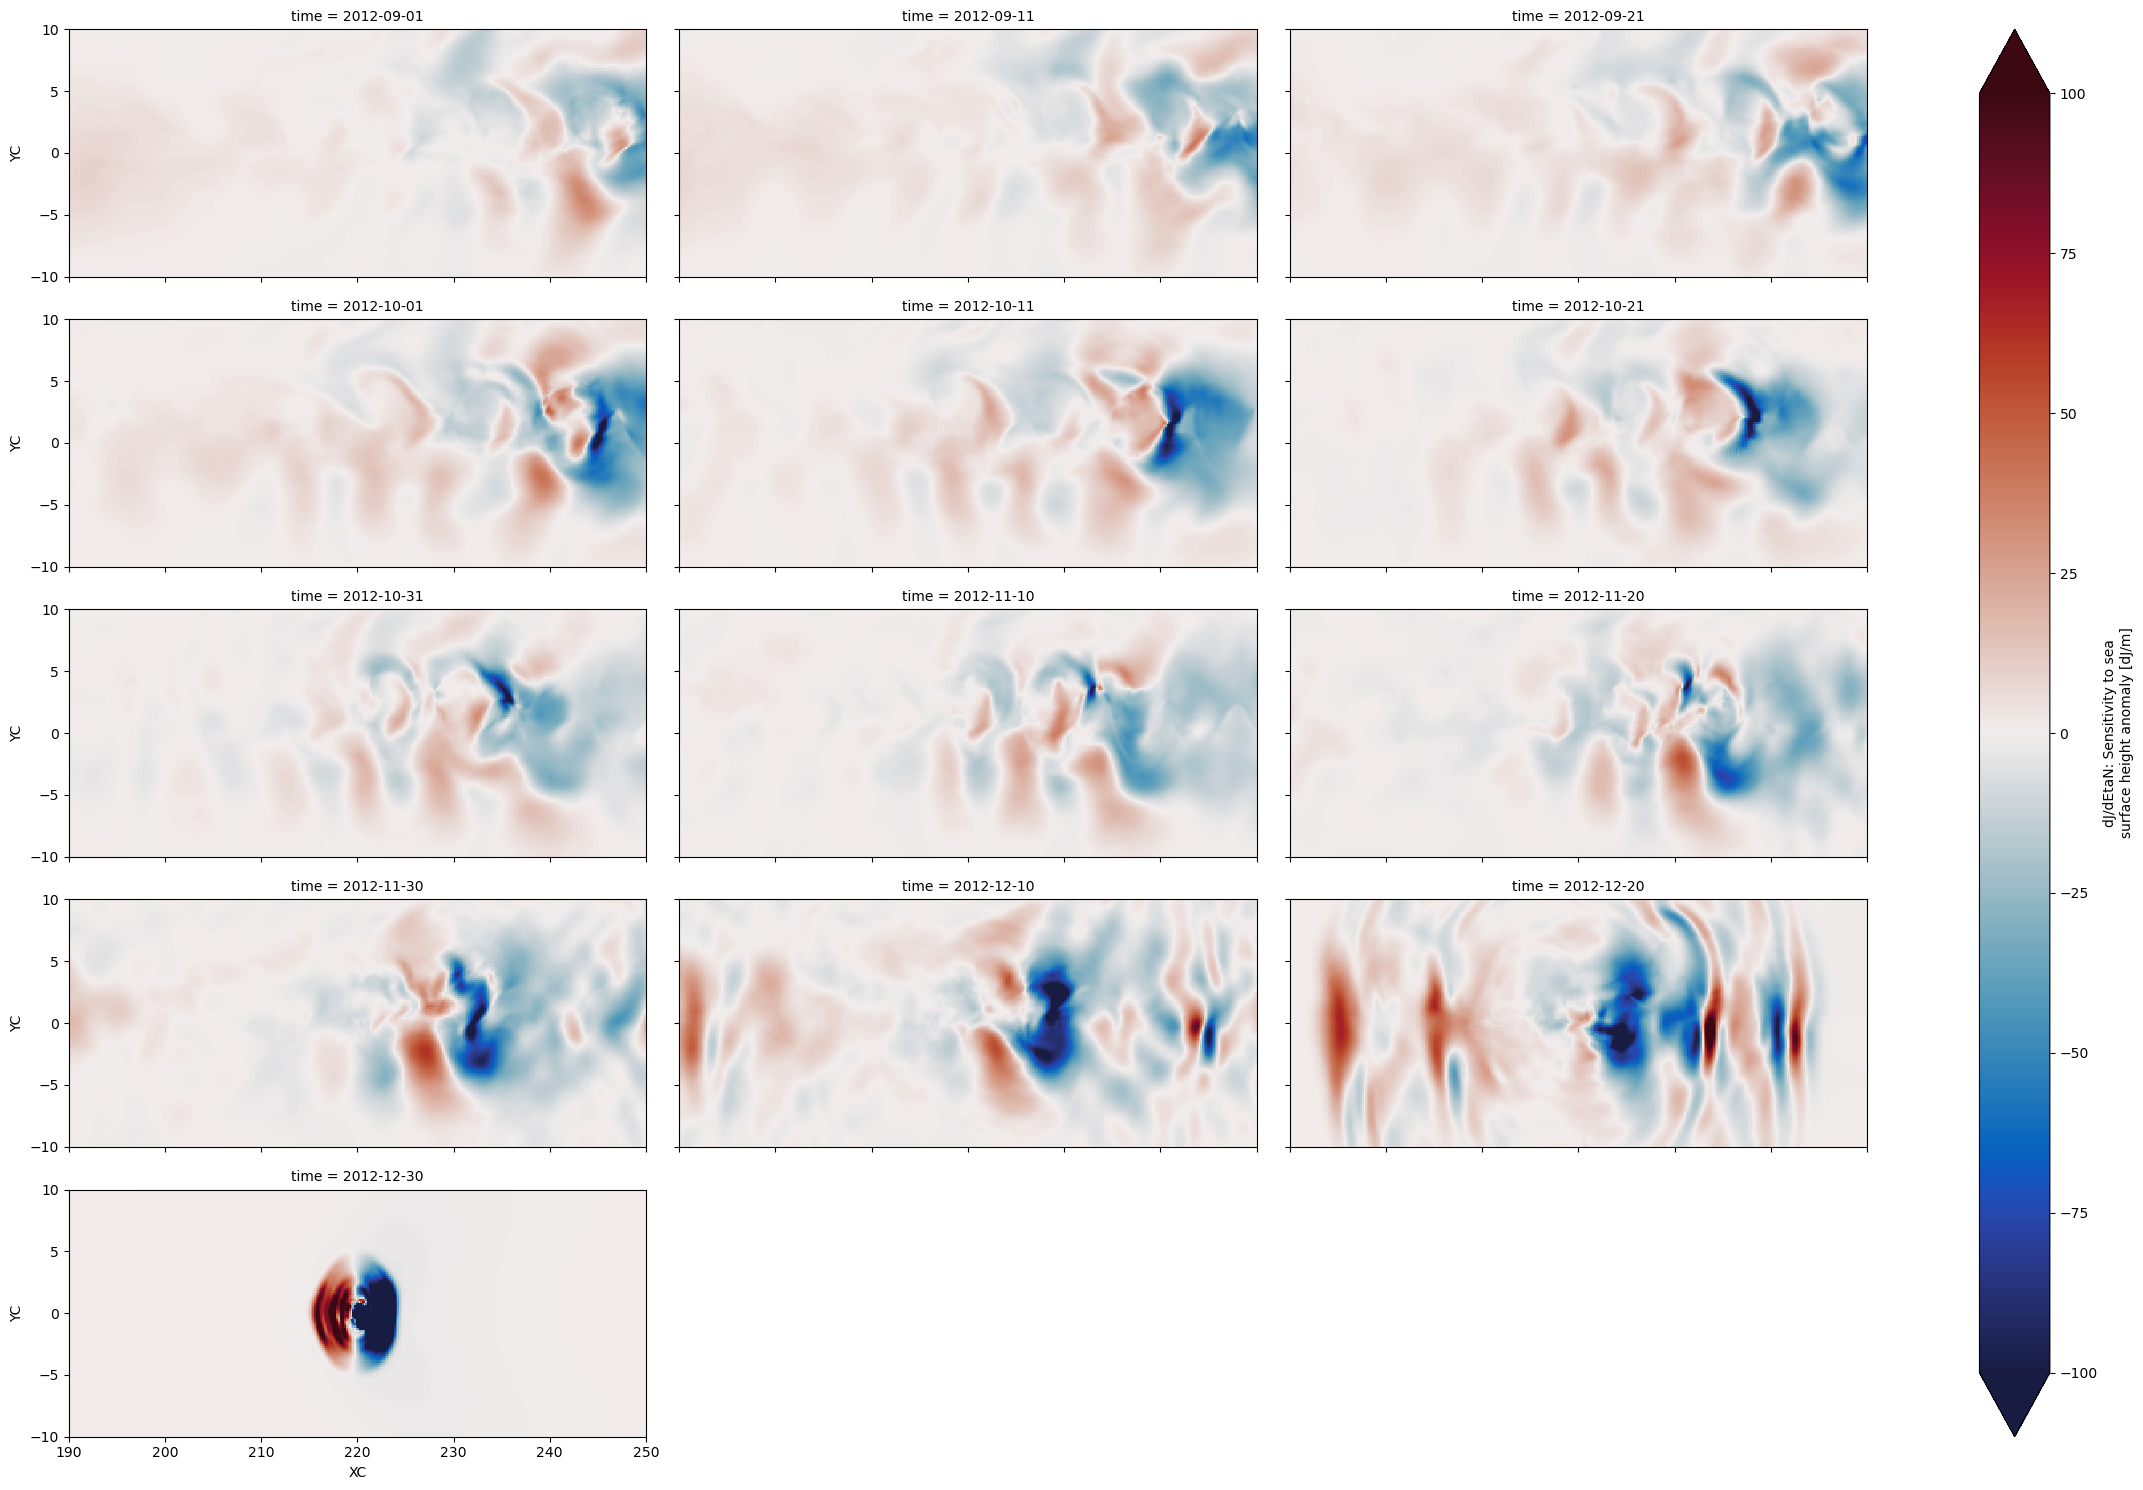

In [16]:
tpose_ds.ADJetan.sel(XC=slice(190,250),YC=slice(-10,10))[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-100, vmax=100,cmap=cmo.balance)

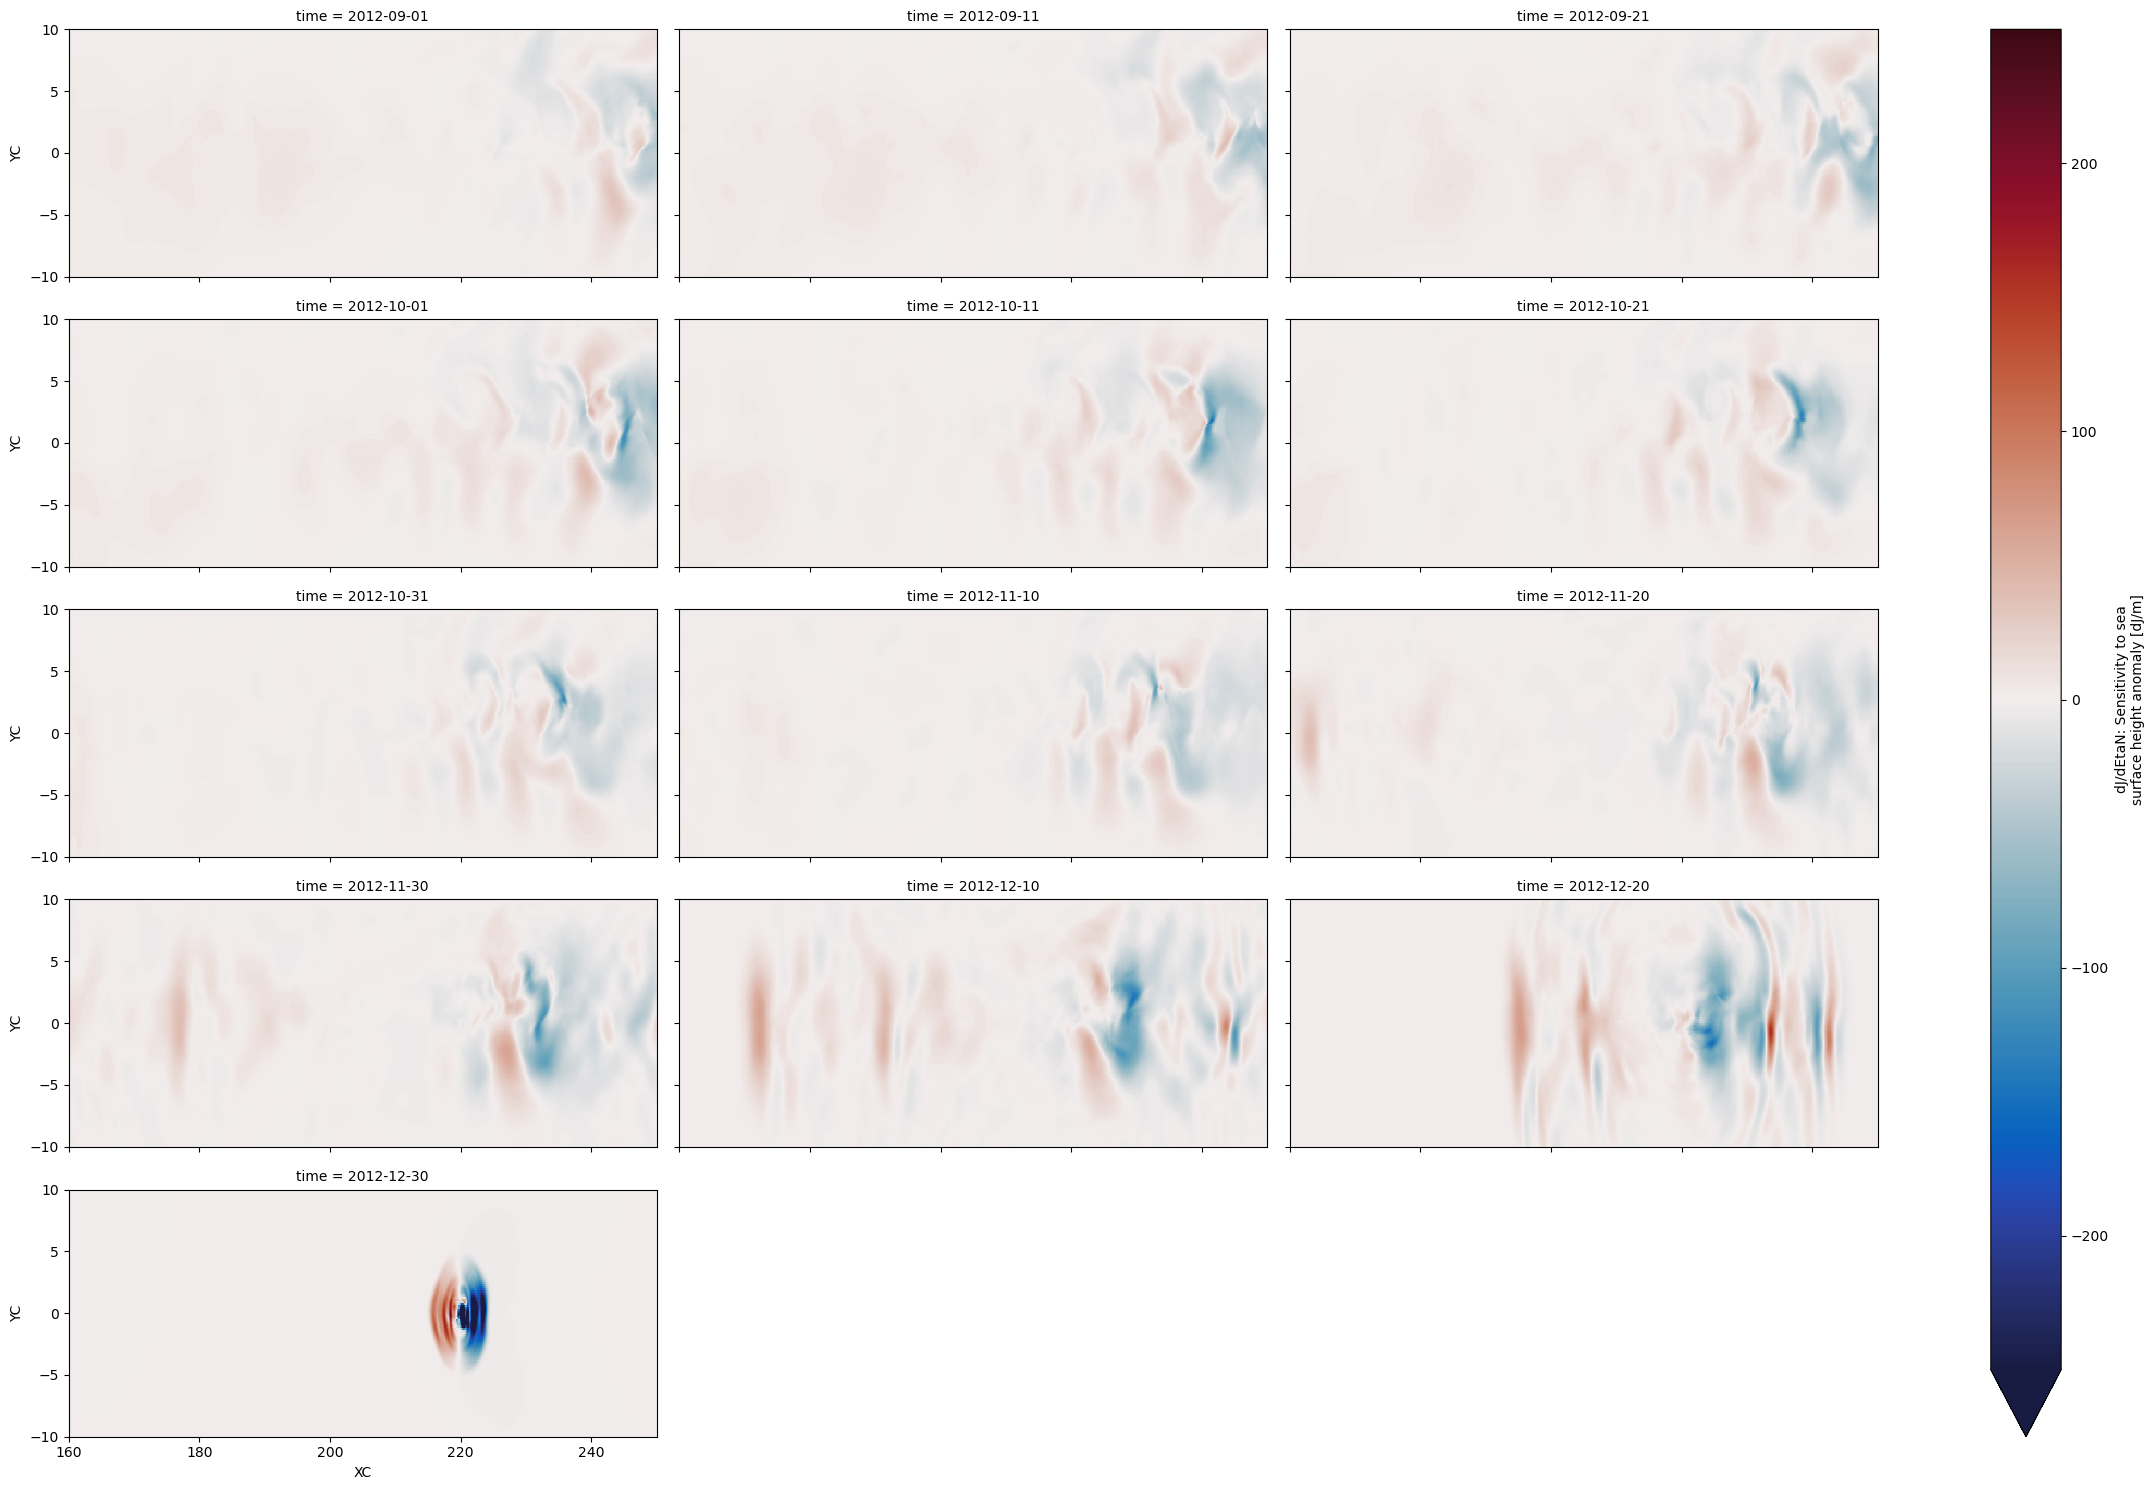

In [17]:
tpose_ds.ADJetan.sel(XC=slice(160,250),YC=slice(-10,10))[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-250, vmax=250,cmap=cmo.balance)

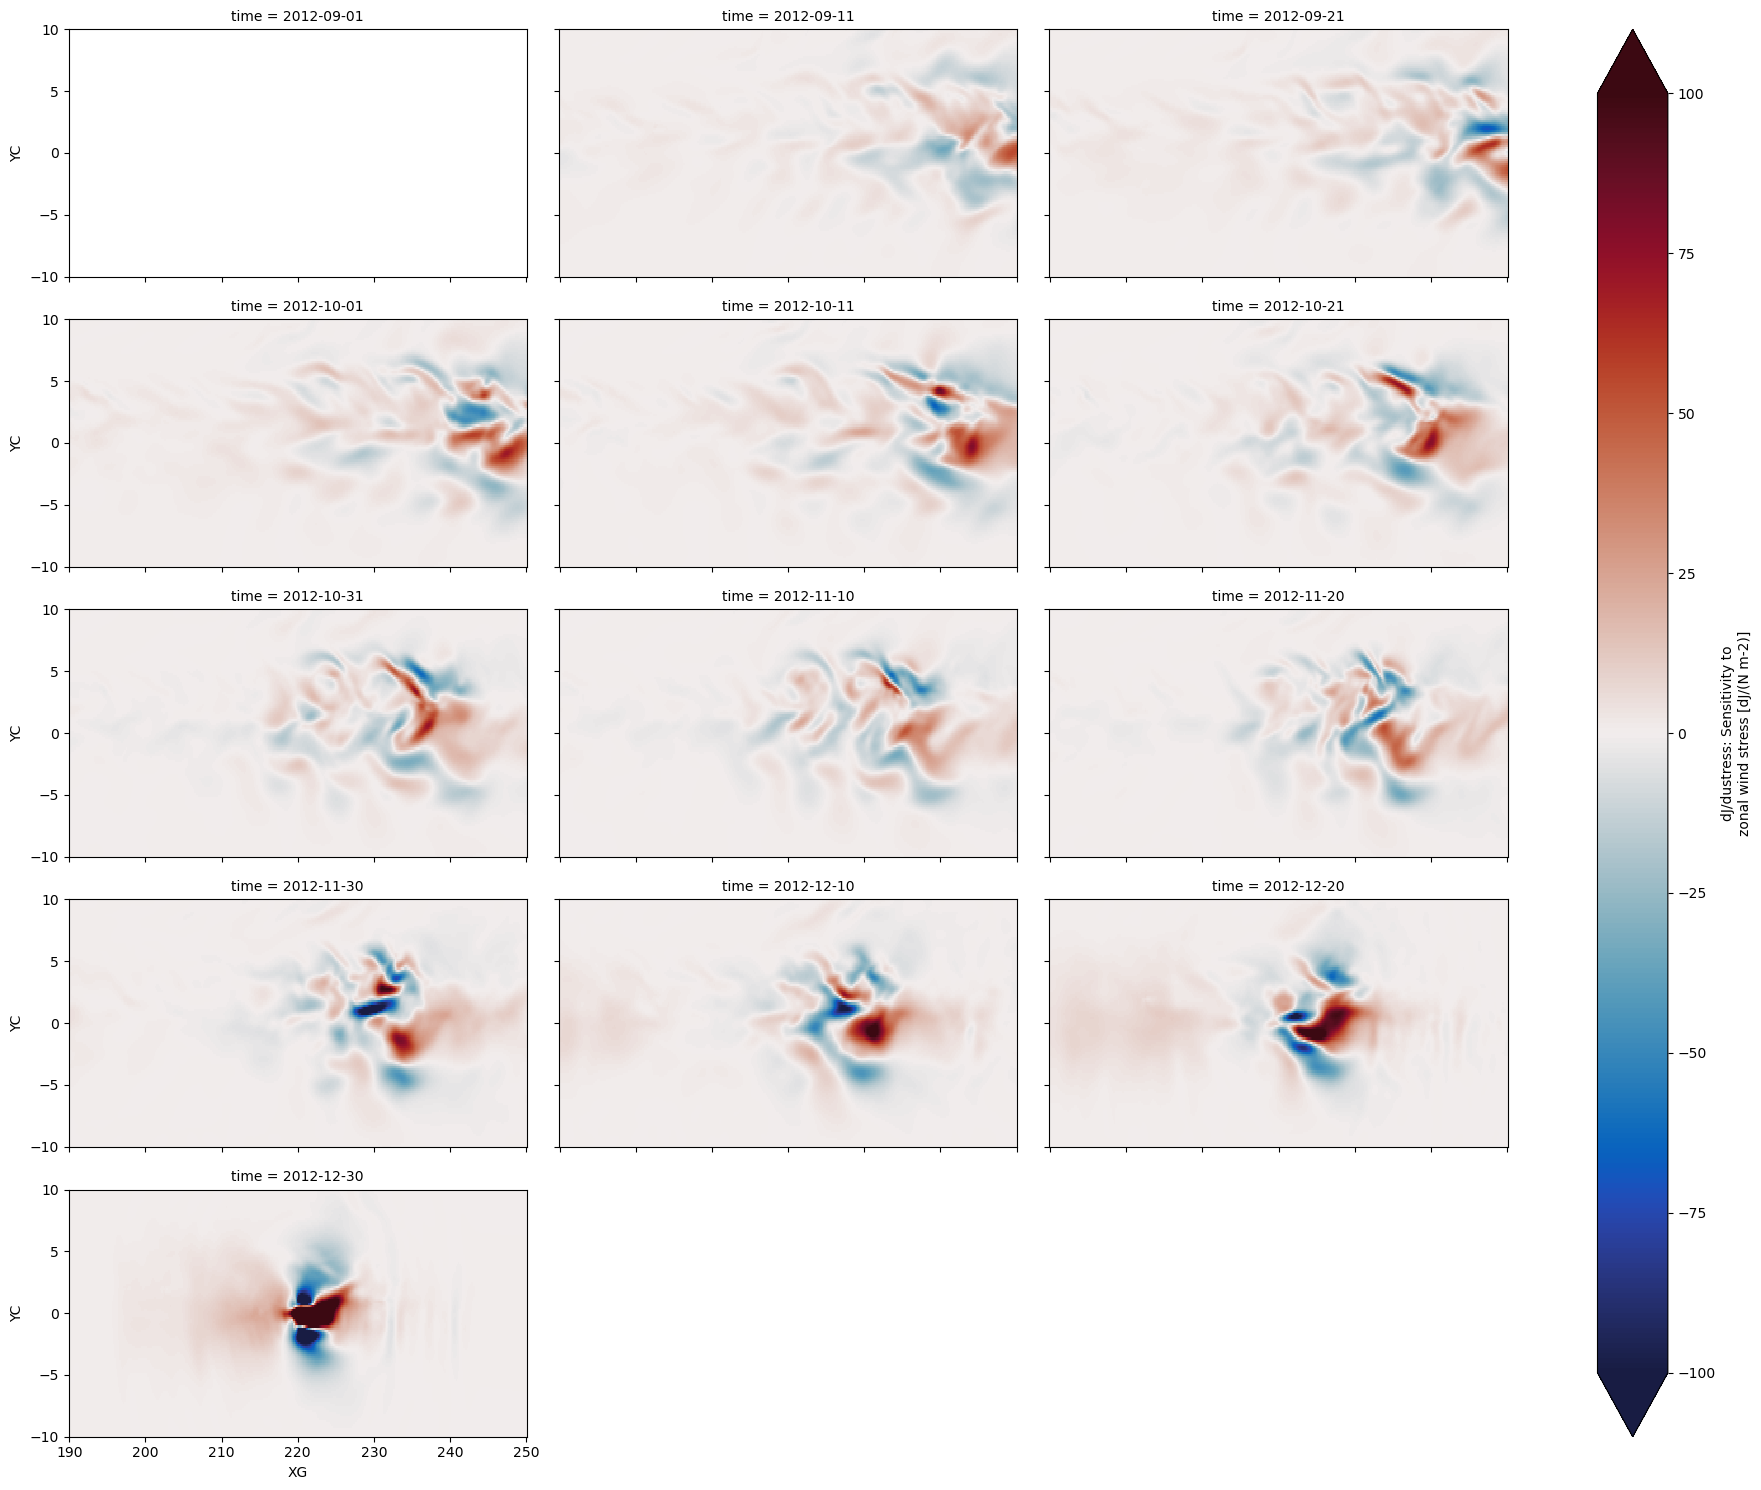

In [30]:
(tpose_ds.ADJustress.rolling(time=10).mean()).sel(XG=slice(190,250),YC=slice(-10,10))[::10].plot(x='XG', y='YC', col='time', col_wrap=3, aspect=2,cmap=cmo.balance, vmin=-100,vmax=100)

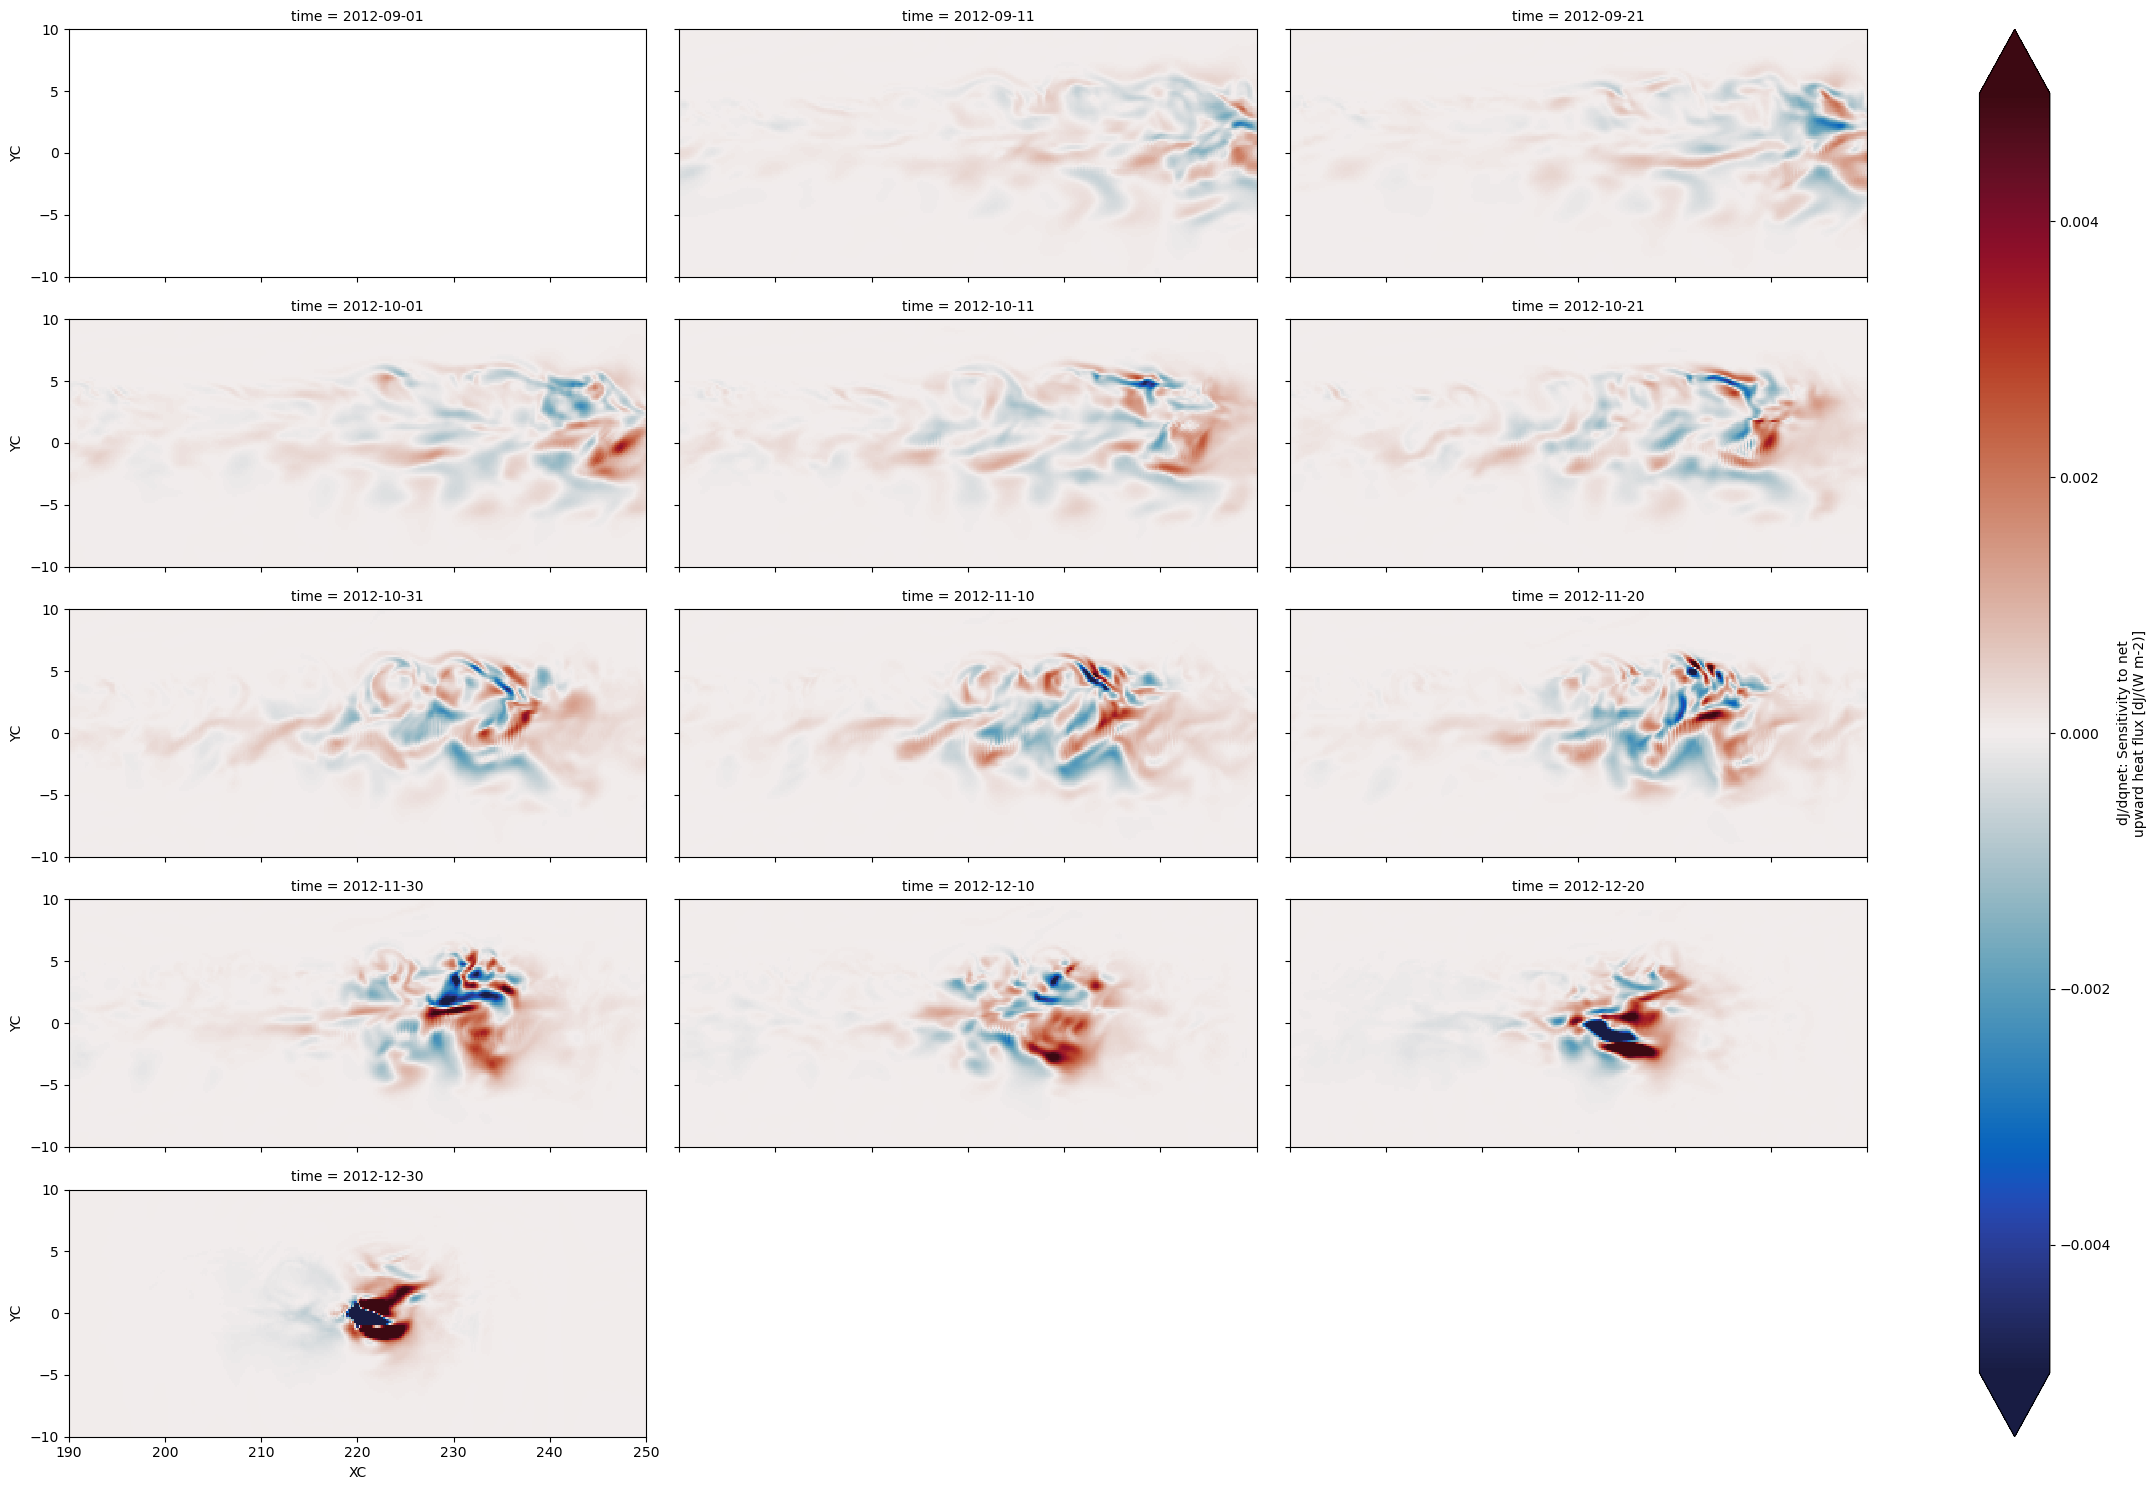

In [18]:
(tpose_ds.ADJqnet.rolling(time=10).mean()).sel(XC=slice(190,250),YC=slice(-10,10))[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.005, vmax=0.005, robust=True)

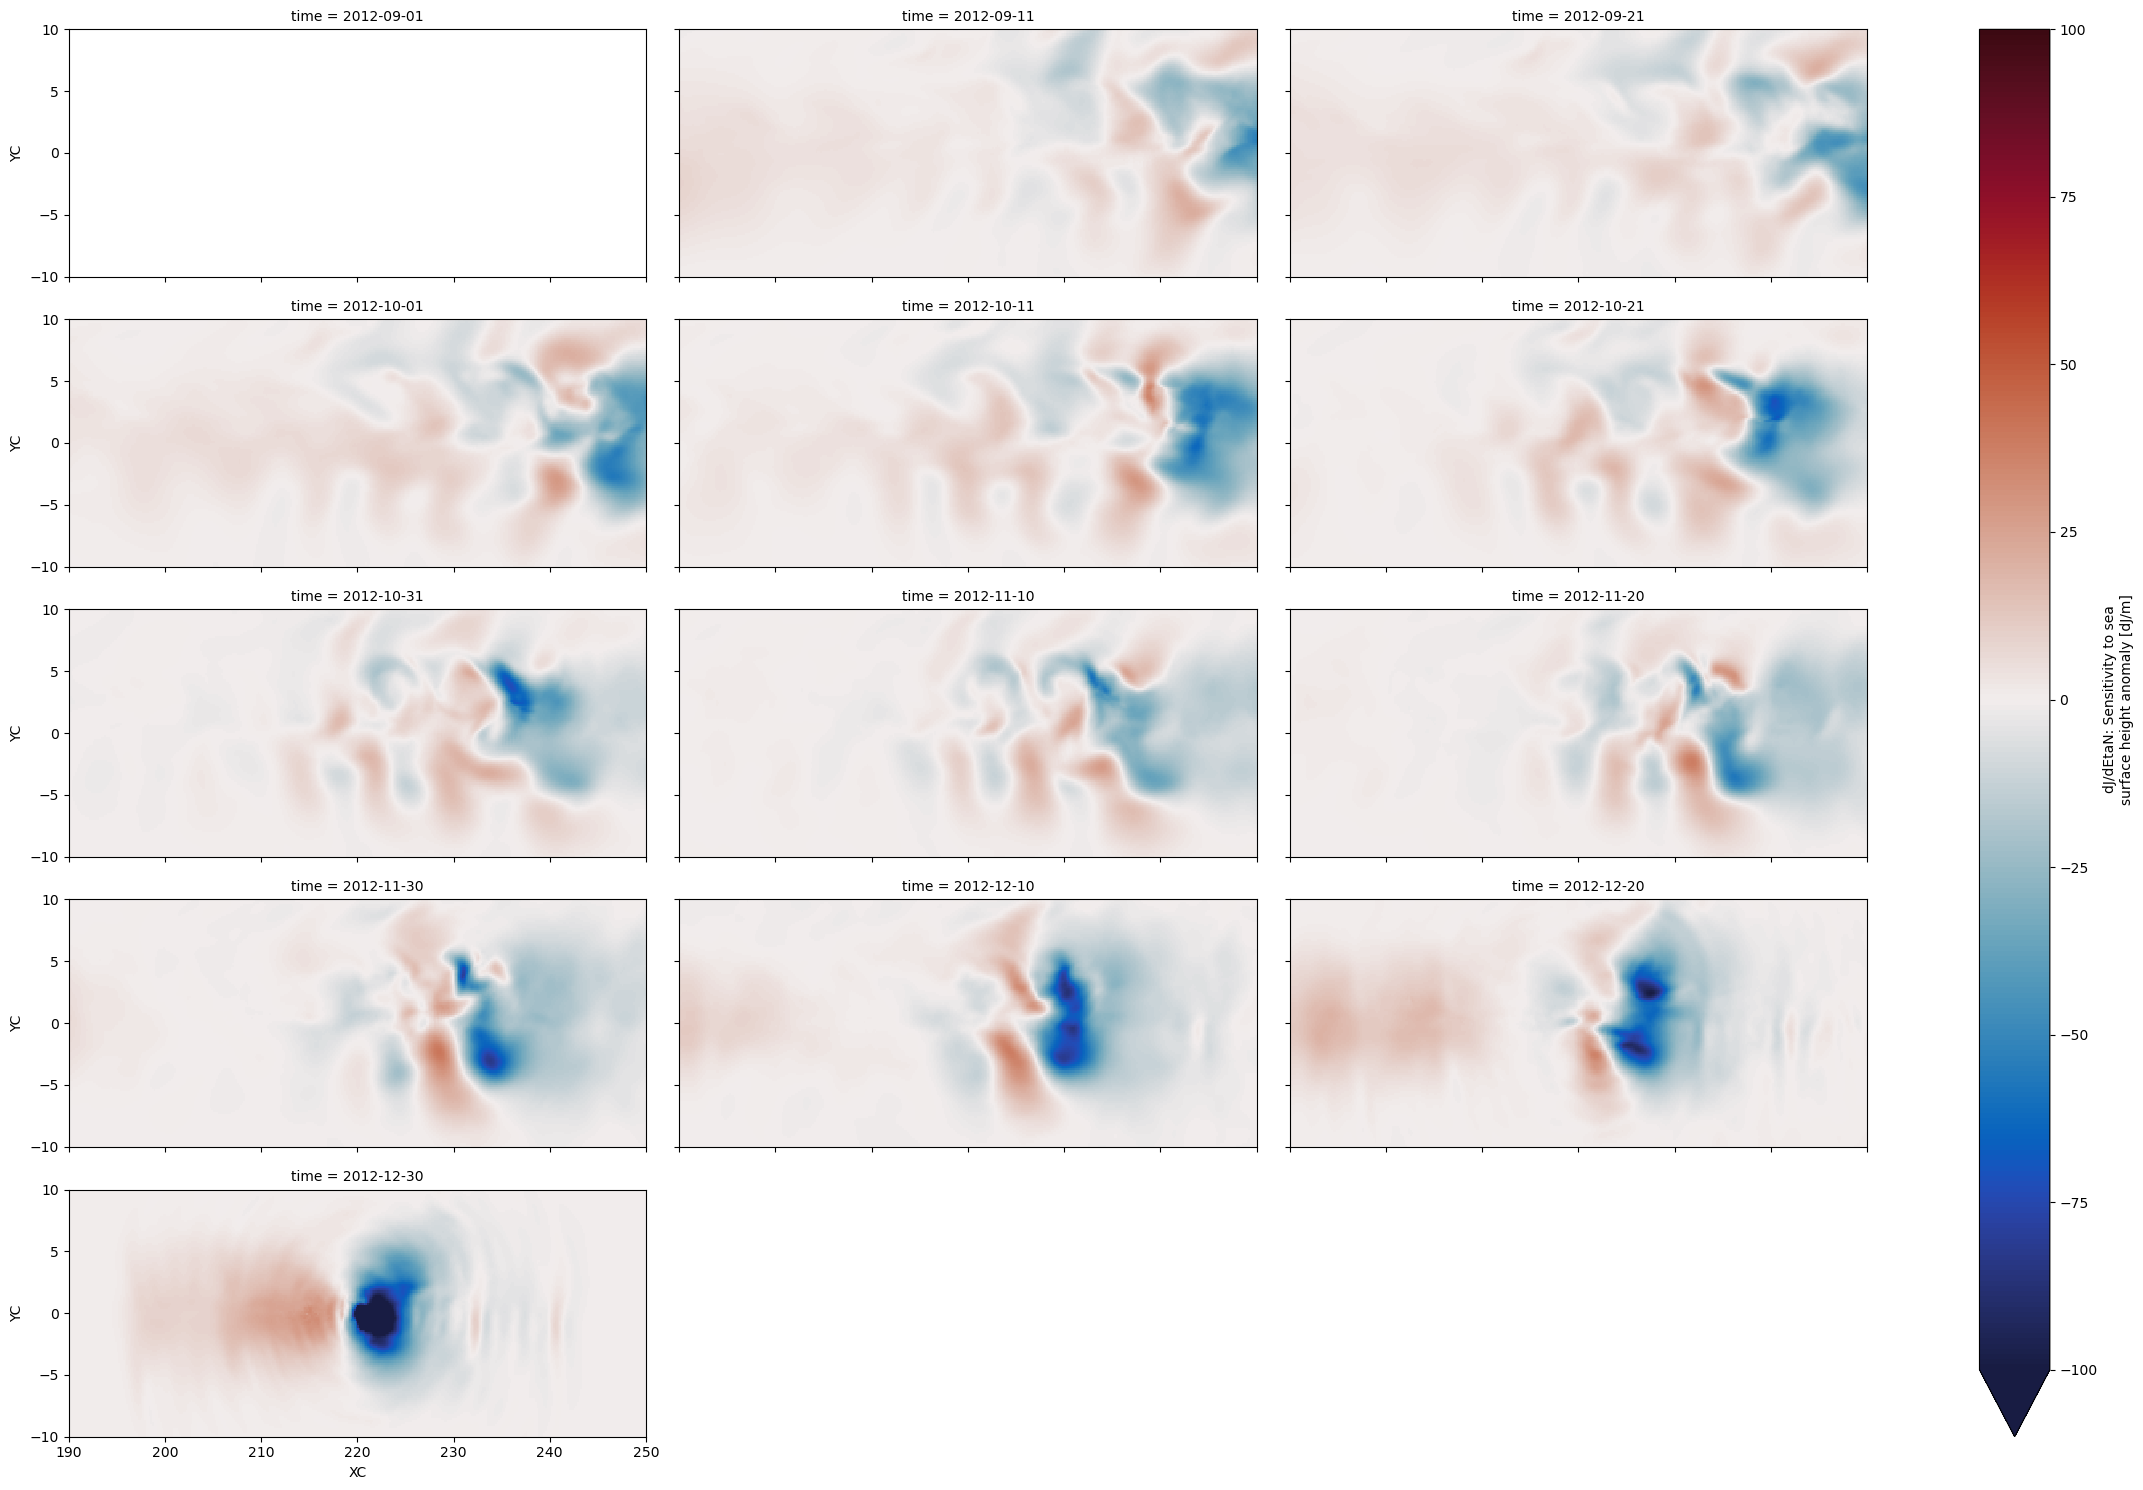

In [19]:
(tpose_ds.ADJetan.rolling(time=10).mean()).sel(XC=slice(190,250),YC=slice(-10,10))[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-100,vmax=100, cmap=cmo.balance)

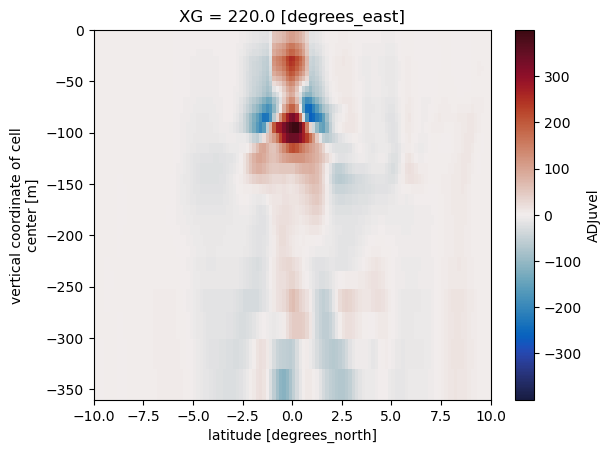

In [18]:
tpose_ds.ADJuvel[:,:40].mean(dim='time').sel(XG=[220.0],method='nearest').sel(YC=slice(-10,10)).plot(x='YC', y='Z', cmap=cmo.balance)

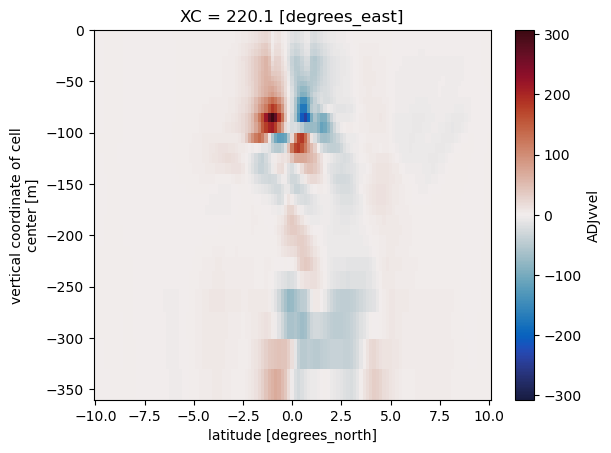

In [19]:
tpose_ds.ADJvvel[:,:40].mean(dim='time').sel(XC=[220.0],method='nearest').sel(YG=slice(-10,10)).plot(x='YG', y='Z', cmap=cmo.balance)

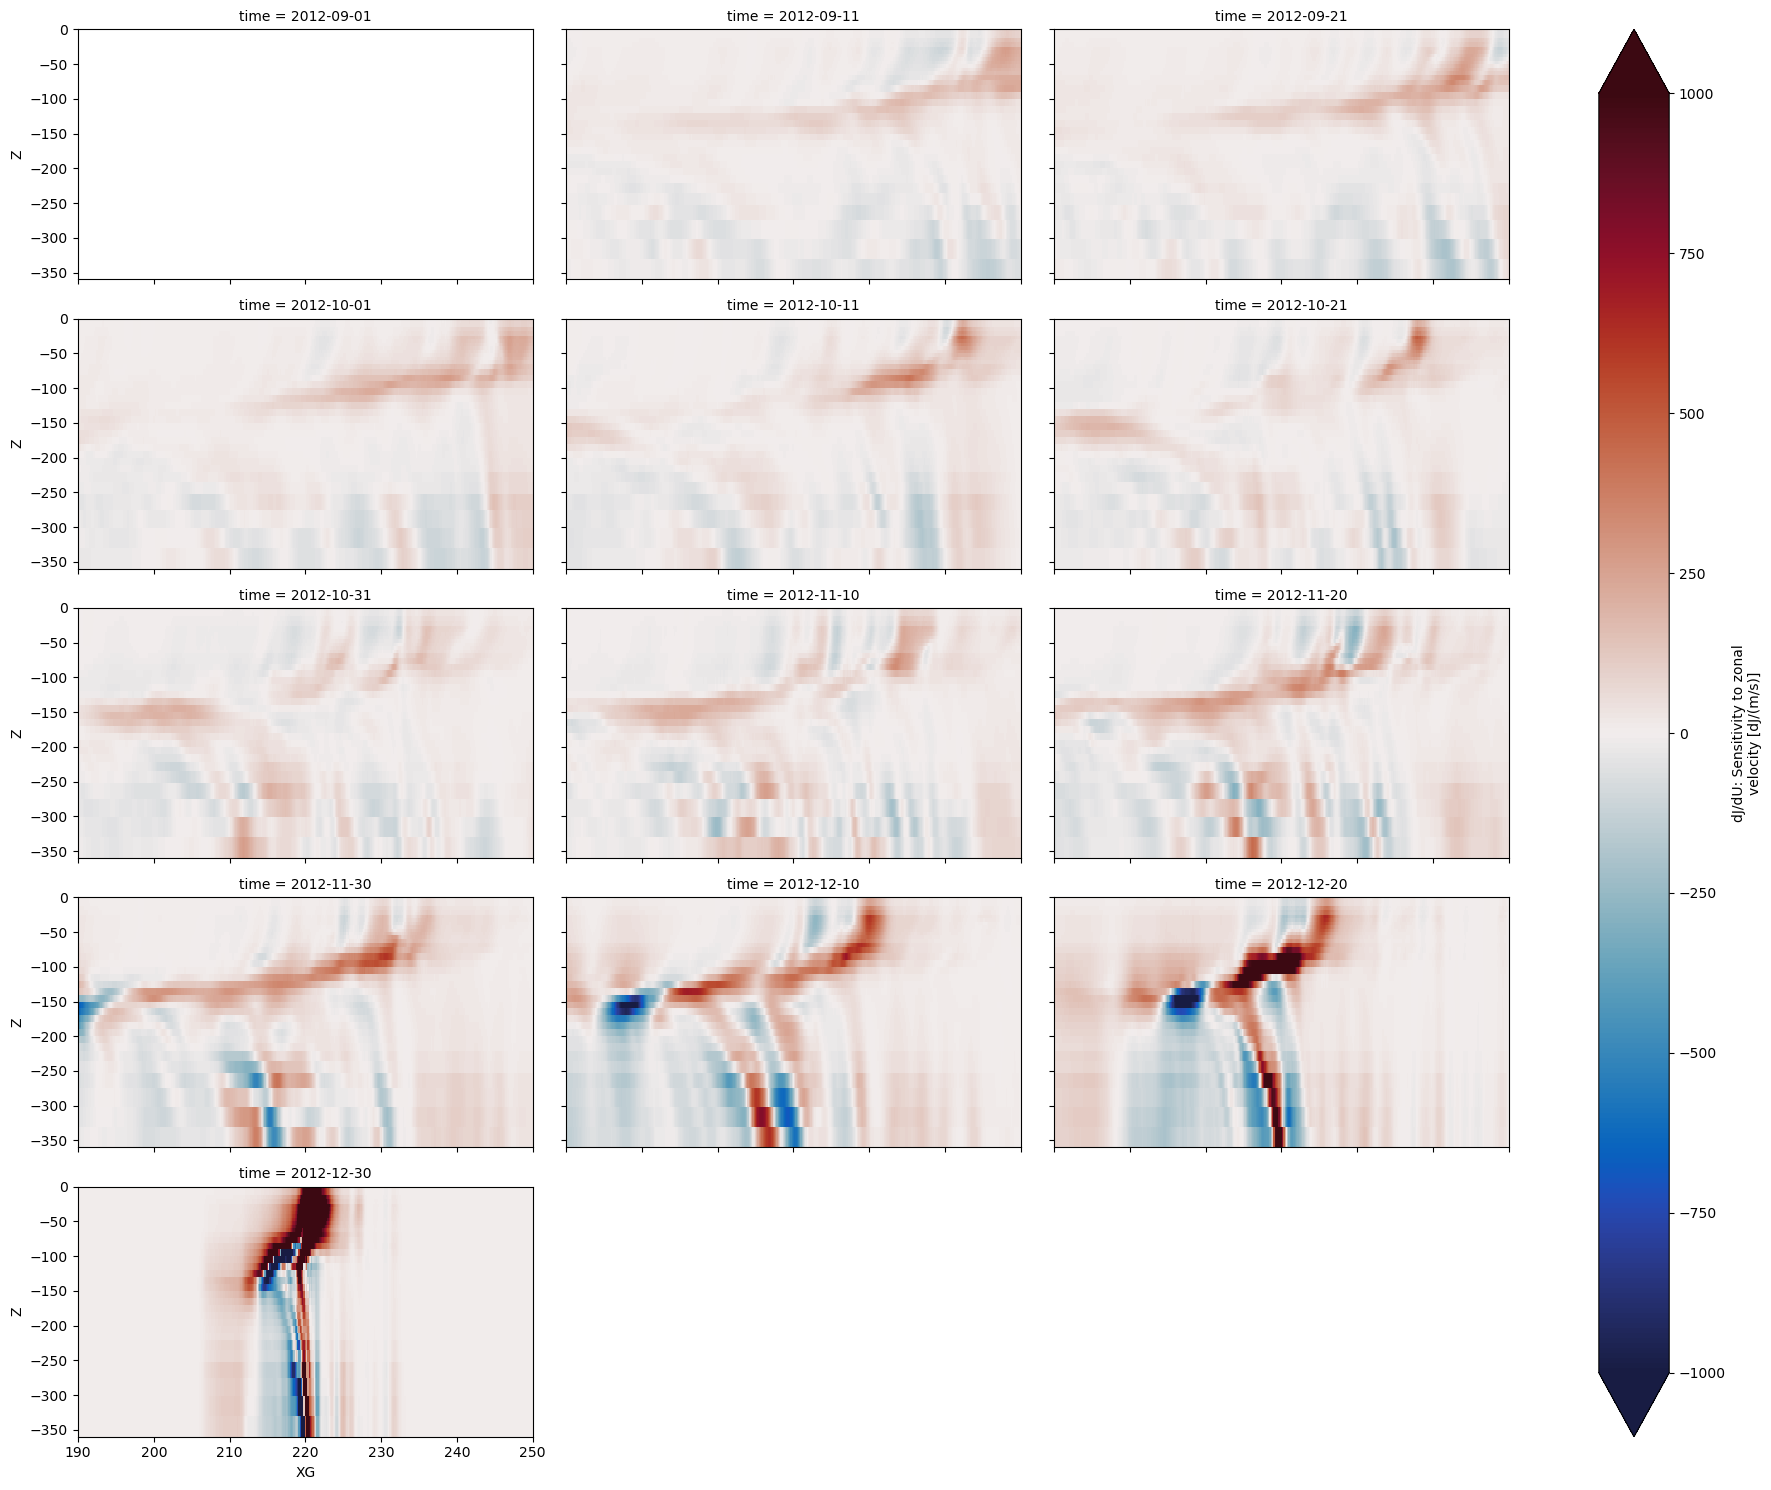

In [22]:
(tpose_ds.ADJuvel.rolling(time=5).mean())[::10,:40].sel(YC=[0.0],method='nearest').sel(XG=slice(190,250)).plot(x='XG', y='Z', col='time', col_wrap=3, aspect=2, vmin=-1000, vmax=1000,cmap=cmo.balance)

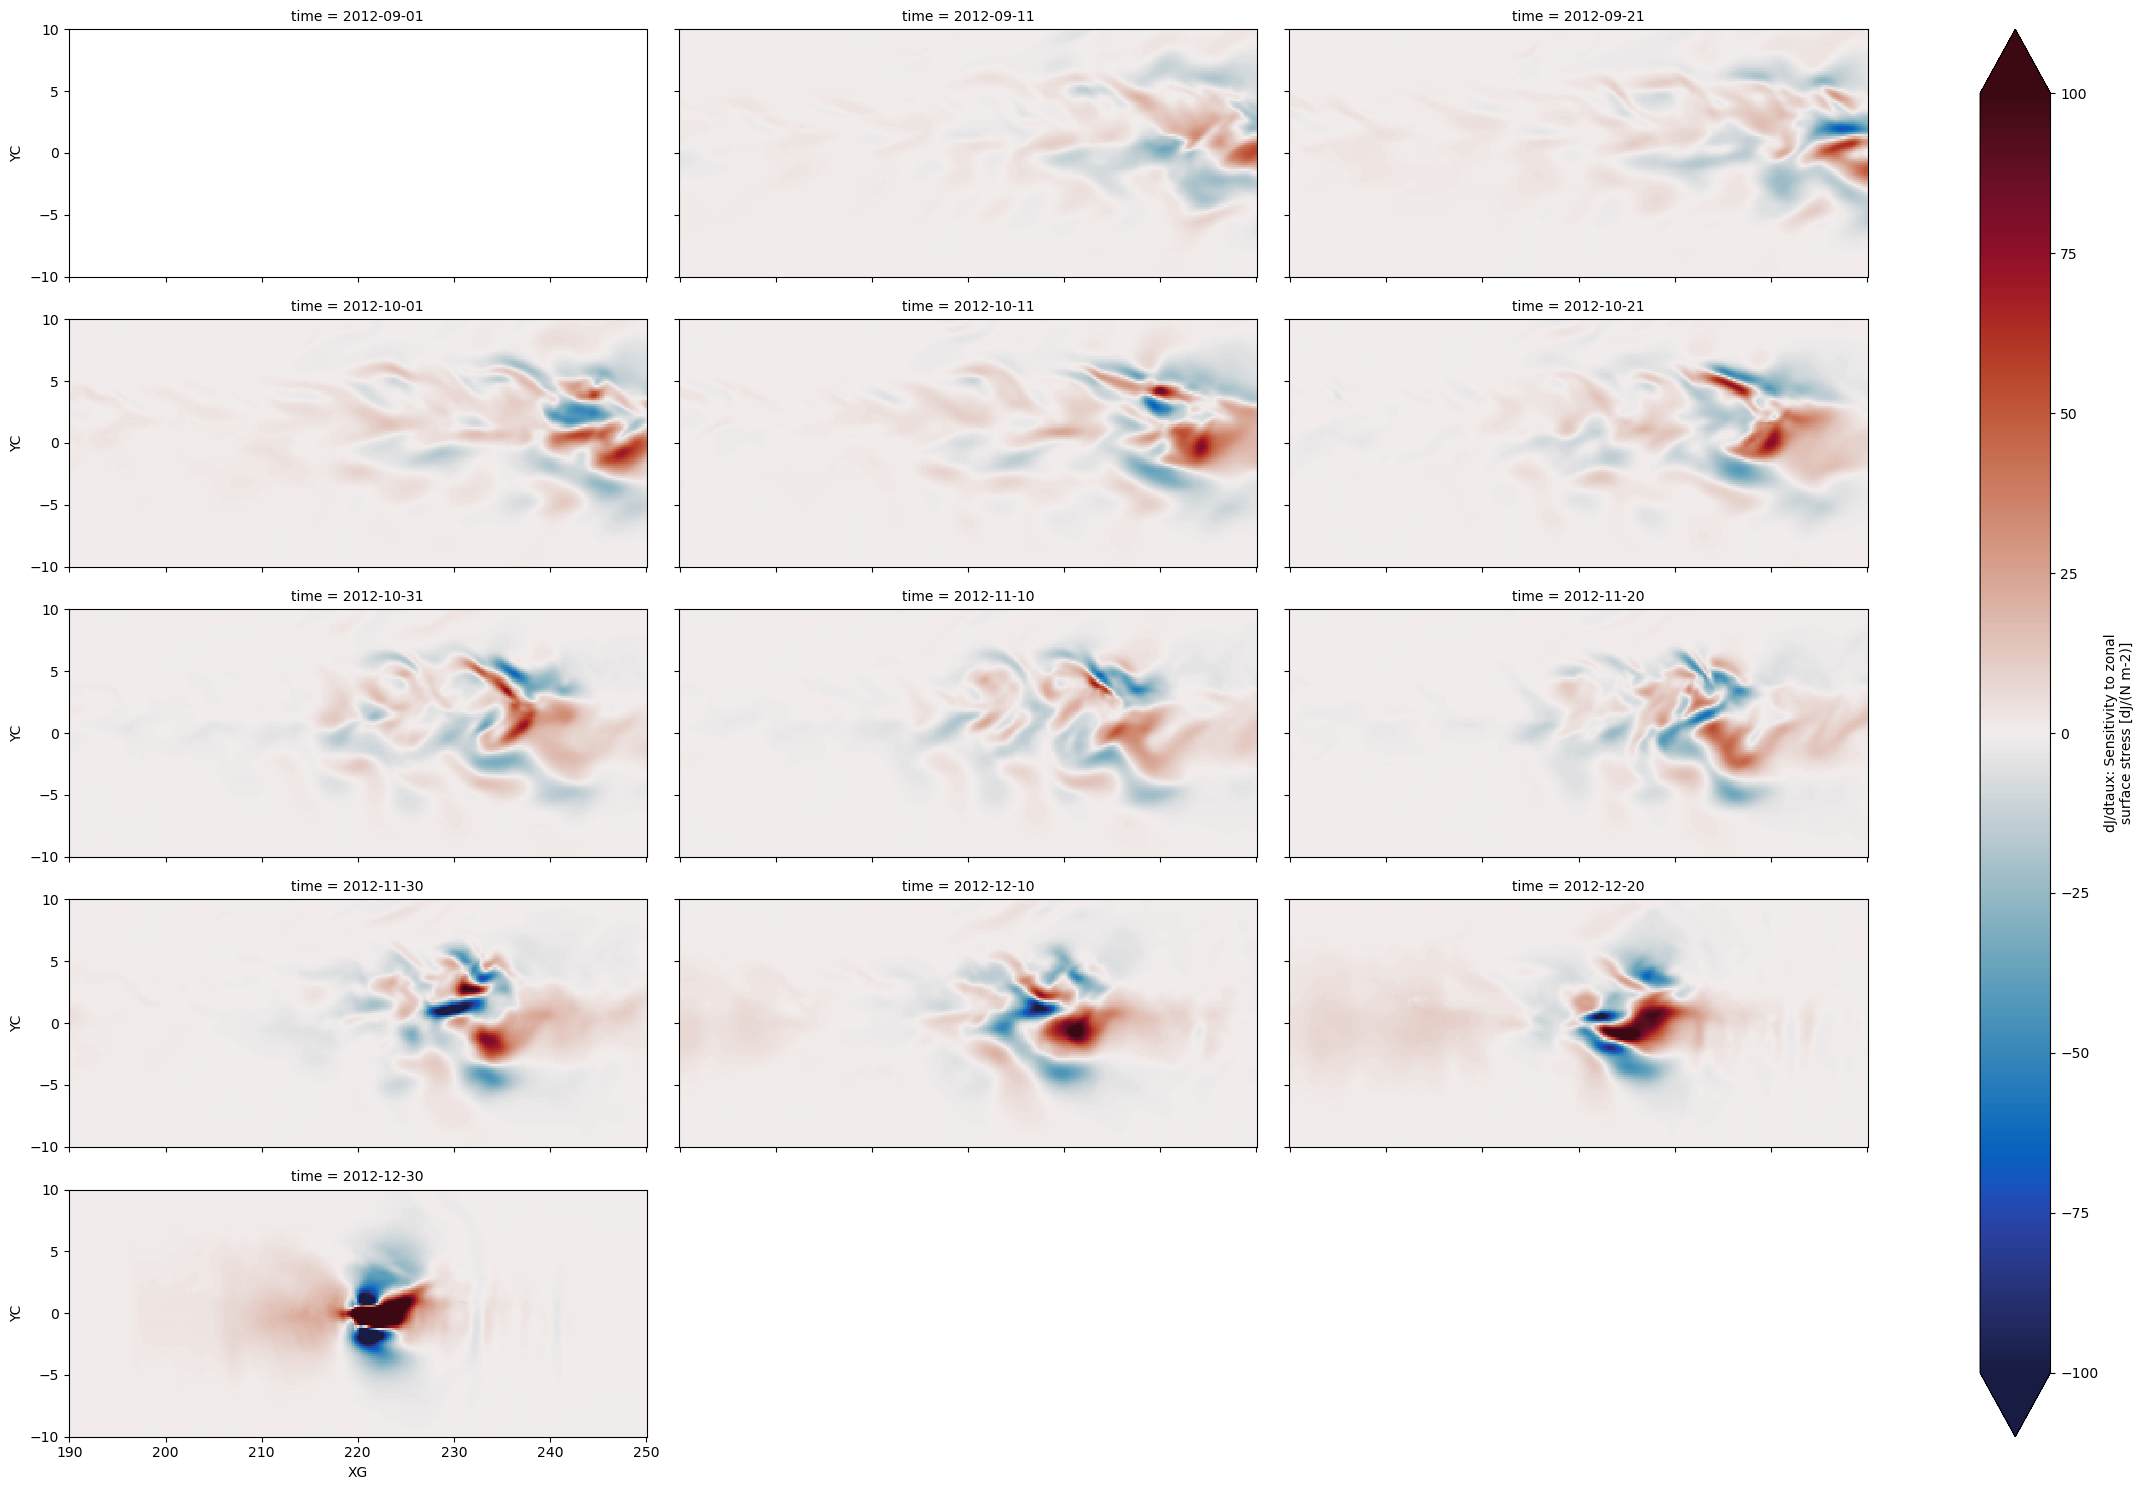

In [25]:
(tpose_ds.ADJtaux.rolling(time=10).mean())[::10].sel(XG=slice(190,250),YC=slice(-10,10)).plot(x='XG', y='YC', col='time', col_wrap=3, aspect=2.5,vmin=-100,vmax=100,cmap=cmo.balance)

In [35]:
client.shutdown()